# **PREDICTING SOCIAL HEALTH INSURANCE FUND CONTRIBUTIONS FROM KENYA’S INFORMAL SECTOR WORKERS**
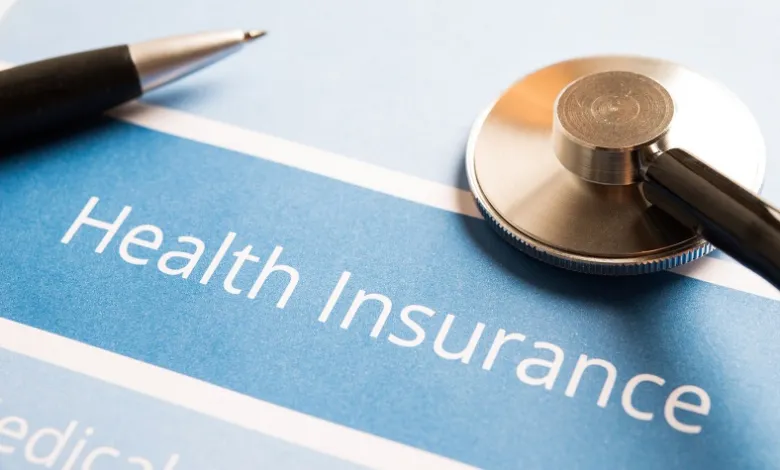

# **COLLABORATORS**
    

1. Cynthia Dalmas
2. Brian Ochieng
3. Nicole Bosibori
4. Nyakio Ruth
5. Edwin Mutendwa             

# **TABLE OF CONTENT**

1.Introduction

2.Business Understanding

3.Data Understanding

4.Problem Statement

5.Objectives

6.Metric of success

7.Preparation and Cleaning the data

8.Exploratory Data Analysis

9.Statistical Analysis

10.Data PreProcessing

11.Modelling

12.Evaluation

13.Conclusion

14.Recomendations

15.Next Steps

## **INTRODUCTION**

In 2023, the government of Kenya enacted the Social Health Insurance Act of 2023, marking a significant step towards Universal Health Coverage. This legislation ensures that all citizens can access quality healthcare services without facing catastrophic health expenses.

An accurate income prediction model can significantly improve the SHIF program. It can streamline contribution collection by determining appropriate amounts for informal workers, ensuring fairness and accuracy. The model can also identify low-income households within the informal sector, enabling targeted social programs that support the most vulnerable. Furthermore, data insights from the model can inform policy decisions that directly impact informal workers and the overall SHIF program, making the system more responsive and efficient.
.



## **STAKEHOLDERS**

1. Informal Sector Workers: Beneficiaries who will receive fair and accurate contribution assessments and targeted social programs.
2. Government of Kenya: Implementers of the SHIF program who will benefit from streamlined contribution collection and informed policy decisions.

## **BUSINESS UNDERSTANDING**

A critical challenge in implementing this Act lies in determining appropriate contributions from informal sector workers, who make up a substantial portion of the Kenyan workforce. Unlike formal employment with documented salaries, income in the informal sector is often variable and undocumented, complicating the process of contribution assessment. About 80% of Kenya’s population is engaged in the informal sector, and it is difficult to determine the monthly income, and by extension the SHI contributions, for this sector

## **DATA UNDERSTANDING**


The project aims to use publicly available data from the Kenya National Bureau of Statistics (KNBS), specifically the Kenya - Kenya Demographic and Health Survey 2022. KNBS collects data on household indicators from various regions in Kenya. Some of the variables include:**

Data Link: https://statistics.knbs.or.ke/nada/index.php/catalog/125#metadata-data_collection

    • House Structure: Type and quality of housing.
    
    • Sources of Water: Accessibility and types of water sources.
    
    • Incomes: Documented and estimated income levels.
    
    • Urban or Rural: Classification of the area as urban or rural.


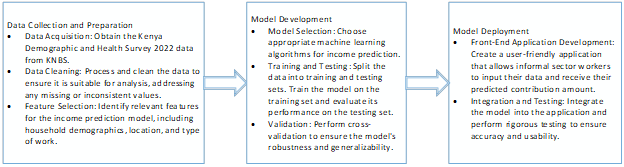



## **PROBLEM STATEMENT**

Determining appropriate contributions for informal sector workers is challenging due to the variable and undocumented nature of their income. This project aims to develop a machine learning model to predict the income of informal sector workers, ensuring accurate and fair contributions to the Social Health Insurance Fund (SHIF).

## **JUSTIFICATION OF THE PROBLEM**

The informal sector is a significant contributor to the Kenyan economy, yet informal workers often face challenges accessing social security benefits due to the undocumented and variable nature of their income. This presents a critical barrier to achieving Universal Health Coverage (UHC) through the Social Health Insurance Fund (SHIF).
Here's why predicting income for informal workers is a crucial problem to address:
- Fair and Equitable Contributions: An accurate income prediction model ensures fair contribution assessments for informal workers to the SHIF. Without such a model, some workers might be under- or over-charged, hindering the program's financial sustainability and fairness.
- Improved Program Efficiency: Streamlining contribution collection through a reliable model reduces administrative burdens, allowing the SHIF to focus on core functions like healthcare provision.
- Targeted Social Programs: Identifying low-income households within the informal sector enables the development of targeted social programs that directly address their needs. This improves the overall impact of social safety nets.
- Data-Driven Policy Decisions: Insights from the model can inform policy changes that better support informal workers and optimize the SHIF program. This promotes a more responsive and effective social security system.


## **OBJECTIVES**

**Main Objective**

1.	Develop a model to predict the contribution of the informal sector workers to the Social Health Insurance Fund based on data from household demographics, location, income group and type of work.

**Specific Objective**

1. Conduct Exploratory Data Analysis (EDA): Analyze the dataset to understand the distribution and relationships of various features and identify patterns associated with Income per month.
2.	Create an easy-to-use Chatbot that allows informal sector workers to determine their required contributions to the SHIF based on the prediction model.
3.	Utilize insights from the model to inform and support policy decisions, ensuring that SHIF contributions are fair and equitable for all informal sector workers.


## **METRICS OF SUCCESS**


1. 	Accuracy & F1 Score metrics will be used to evaluate the balance between precision and recall in classifying low-income households within the informal sector, ensuring targeted social programs are accurately directed.
2. ROC curves will be used to identify the best classification model
3. Feature importance:
4. User Satisfaction Score: This metric will gauge the ease of use of the Chatbot to determine their SHIF contribution
5. Policy Impact Assessment: This metric will evaluate how effectively our model's insights support policy decisions.


## **DATA PREPARATION**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kruskal

In [2]:
#read csv files
data=pd.read_csv('Dataset 2.csv')
data.head()

,case identification,respondent's year of birth,respondent's current age,age in 5-year groups,region,type of place of residence,highest educational level,highest year of education,source of drinking water,time to get to water source,...,currently working,occupation,occupation (grouped),use mobile telephone for financial transactions,how much paid in last month,justifies domestic violence: refuses to cook,respondent education,partner education,respondent education.1,how much paid in last month.1
0,1 4 2,1987,34,30-34,mombasa,urban,no education,NaN,public tap/standpipe,15,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,informal education (madrasa/adult basic),35000
1,1 20 2,1992,30,30-34,mombasa,urban,primary,8,piped to yard/plot,on premises,...,yes,motor vehicle drivers,skilled manual,yes,10000,no,primary,primary,"secondary/""a"" level",20000
2,1 78 2,1993,28,25-29,mombasa,urban,higher,4,public tap/standpipe,20,...,yes,construction and maintenance labour/ers,unskilled manual,yes,NaN,no,university,"secondary/""a"" level",primary,100000
3,2 15 2,1995,27,25-29,mombasa,urban,no education,NaN,piped to neighbor,on premises,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,primary,12000
4,2 68 2,1994,28,25-29,mombasa,urban,higher,2,cart with small tank,on premises,...,yes,mechanical engineers,professional/technical/managerial,yes,NaN,no,middle level college (certificate/diploma),middle level college (certificate/diploma),middle level college (certificate/diploma),30000


In [3]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 83 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   case identification                                               5285 non-null   object
 1   respondent's year of birth                                        5285 non-null   int64 
 2   respondent's current age                                          5285 non-null   int64 
 3   age in 5-year groups                                              5285 non-null   object
 4   region                                                            5285 non-null   object
 5   type of place of residence                                        5285 non-null   object
 6   highest educational level                                         5285 non-null   object
 7   highest year of education                 

**The DataFrame contains 5285 entries and 83 columns and data types are integers and objects**

## **DATA CLEANING**

In [4]:
#Make a copy of data
df= pd.read_csv('Dataset 2.csv')

**Dropping duplicated and irrelevant columns**

In [5]:
# Drop  columns
df = df.drop(columns=[
    'highest educational level', 'highest year of education', 'time to get to water source',
    'household has: refrigerator', 'religion','ethnicity','husband/partner\'s education level',
    'education in single years', 'household has: telephone (land-line)','educational level',
    'highest year of education (at level in mv106)', 'religion.1','partner education',
    'relationship to household head.1', 'sex of household head.1', 'age of household head.1',
    'literacy.1', 'owns a mobile telephone.1', 'last 12 months use mobile telephone for financial transactions.1',
    'is respondent\'s mobile phone a smart phone.1', 'has an account in a bank or other financial institution.1',
    'use of internet.1', 'frequency of using internet last month.1', 'self reported health status.1',
    'wealth index combined.1', 'husband/partner\'s total number of years of education',
    'justifies domestic violence: refuses to cook', 'respondent education.1','how much paid in last month',
    'occupation','respondent\'s occupation','case identification','wealth index for urban/rural','husband/partner\'s occupation'
])

# Check the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 49 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   respondent's year of birth                                      5285 non-null   int64 
 1   respondent's current age                                        5285 non-null   int64 
 2   age in 5-year groups                                            5285 non-null   object
 3   region                                                          5285 non-null   object
 4   type of place of residence                                      5285 non-null   object
 5   source of drinking water                                        5285 non-null   object
 6   type of toilet facility                                         5285 non-null   object
 7   household has: electricity                                  

**The columns were dropped due to redandancy,duplication with other columns and others had no impact on the main objective**

**Checking for duplicate rows**

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**Checking and handling unique values in how much paid in last month**

In [7]:
# Display the count of each unique value in the column 'How Much Paid in Last Month.1'
print(df['how much paid in last month.1'].value_counts())

10000     454
15000     400
20000     324
5000      310
30000     285
         ... 
60500       1
104000      1
5700        1
77000       1
480         1
Name: how much paid in last month.1, Length: 199, dtype: int64


In [8]:
# Replace 'don't know' with NaN and 'did not work in last month' with 0
df['how much paid in last month.1'] = df['how much paid in last month.1'].replace({'don\'t know': np.nan, 'did not work in last month': 0})


**The values did not work in last month and don't know values in the column will be replaced to NaN to improve on the analysis**

**Covert column how much paid in last month to integer for better EDA**

In [9]:
# Convert to numeric, setting failed conversions to NaN
df['how much paid in last month.1'] = pd.to_numeric(df['how much paid in last month.1'], errors='coerce')

**Checking and handling the unique values in husband/partner\'s occupation**

In [10]:
# Display the unique values and their counts for 'husband/partner's occupation (grouped)'
print(df['husband/partner\'s occupation (grouped)'].value_counts())

skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
.a                                     11
Name: husband/partner's occupation (grouped), dtype: int64


In [11]:
# Replace ".a" with "Unknown" in "husband/partner's occupation (grouped)"
df['husband/partner\'s occupation (grouped)'] = df['husband/partner\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify
print(df['husband/partner\'s occupation (grouped)'].value_counts())


skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
Unknown                                11
Name: husband/partner's occupation (grouped), dtype: int64


**Replace rows where 'husband/partner's occupation (grouped)' is '.a' to improve on the data analysis**

**Checking and handling the unique values 'type of cooking fuel'**

In [12]:
# Display the unique values and their counts for 'type of cooking fuel'
print(df['type of cooking fuel'].value_counts())

wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
17                            4
alcohol/ethanol               4
agricultural crop             1
solar power                   1
15                            1
Name: type of cooking fuel, dtype: int64


In [13]:
# Replace '17' and '15' with 'unknown' in the 'type of cooking fuel' column
df['type of cooking fuel'] = df['type of cooking fuel'].replace(['17', '15'], 'unknown')

# Verify
print(df['type of cooking fuel'].value_counts())


wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
unknown                       5
alcohol/ethanol               4
agricultural crop             1
solar power                   1
Name: type of cooking fuel, dtype: int64


**Replace the rows where 'type of cooking fuel' is '17' or '15' with unknown for better data analysis**

**Checking and handling unique values and their counts for 'occupation (grouped)'**

In [14]:
# Display the unique values and their counts for 'occupation (grouped)'
occupation_grouped_counts = df['occupation (grouped)'].value_counts()

# Print the counts
print(occupation_grouped_counts)

agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
.a                                     19
Name: occupation (grouped), dtype: int64


In [15]:
# Replace ".a" with "Unknown" in "occupation (grouped)"
df['occupation (grouped)'] = df['occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['occupation (grouped)'].value_counts())

agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
Unknown                                19
Name: occupation (grouped), dtype: int64


**Replace rows where 'occupation (grouped)' is '.a' with unknown give insight to the data**

**Checking and handling unique values and their counts for respondent's occupation (grouped)**

In [16]:
# Display the unique values and their counts for 'occupation (grouped)'
respondent_occupation_grouped_counts = df['respondent\'s occupation (grouped)'].value_counts()

# Print the counts
print(respondent_occupation_grouped_counts)

not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
.a                                      6
Name: respondent's occupation (grouped), dtype: int64


In [17]:
# Replace ".a" with "Unknown" in "respondent's occupation (grouped)"
df['respondent\'s occupation (grouped)'] = df['respondent\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['respondent\'s occupation (grouped)'].value_counts())

not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
Unknown                                 6
Name: respondent's occupation (grouped), dtype: int64


**Replace rows where 'respondent's occupation (grouped)' is '.a' with unknown give insight to the data**

**Checking for missing values**

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

is respondent's mobile phone a smart phone    957
how much paid in last month.1                 675
dtype: int64

**Handling the missing values**

In [19]:
# Fill missing values in 'is respondent's mobile phone a smart phone' with mode
df['is respondent\'s mobile phone a smart phone'] = df['is respondent\'s mobile phone a smart phone'].fillna(df['is respondent\'s mobile phone a smart phone'].mode()[0])

# Impute missing income values with the median
df['how much paid in last month.1'] = df['how much paid in last month.1'].fillna(df['how much paid in last month.1'].median())


In [20]:
# Confirm missing values
missing_values = df.isnull().sum()
missing_values

respondent's year of birth                                        0
respondent's current age                                          0
age in 5-year groups                                              0
region                                                            0
type of place of residence                                        0
source of drinking water                                          0
type of toilet facility                                           0
household has: electricity                                        0
household has: radio                                              0
household has: television                                         0
household has: bicycle                                            0
household has: motorcycle/scooter                                 0
household has: car/truck                                          0
main floor material                                               0
main wall material                              

**The missing values in is respondents mobile phone a smart phone  was filled with mode and and how much paid in last month.1 was filled with median reasons is the datatype of each**

**Checking for outliers**

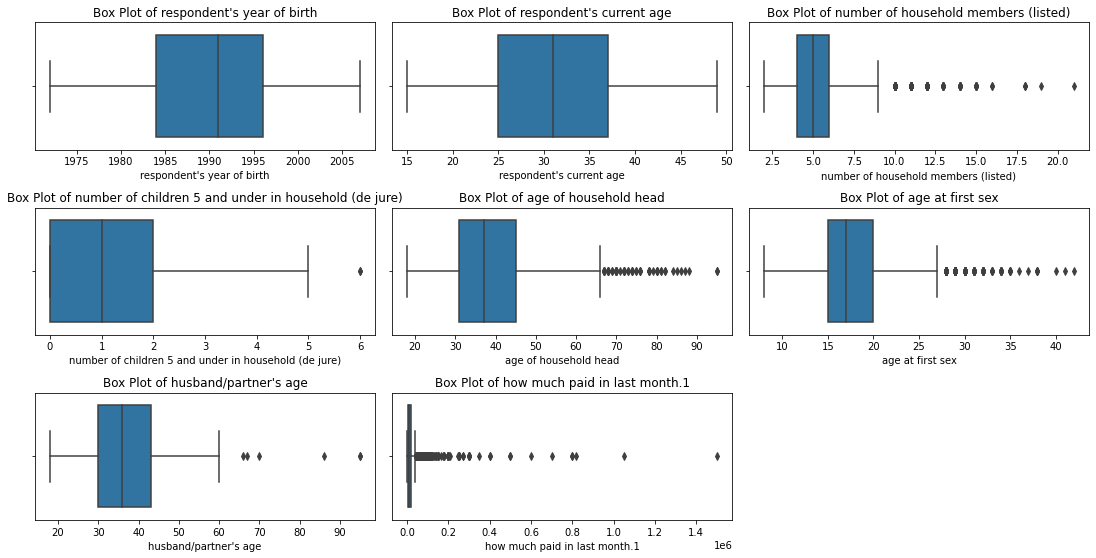

In [21]:
# Select numeric columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

**Handle the outliers  by capping them inorder to maintain all datapoints**

In [22]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df = cap_outliers(df, column)

# Check the shape of the dataframe after capping outliers
print(df.shape)


(5285, 49)


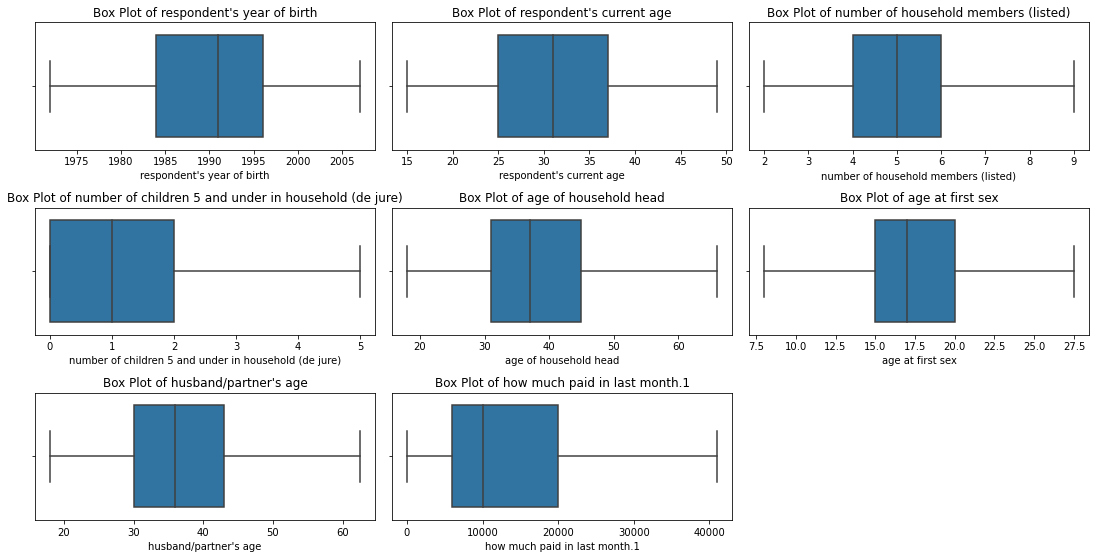

In [23]:
# Confirm the outliers were handled
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

#  **EXPLORATORY DATA ANALYSIS 📉**

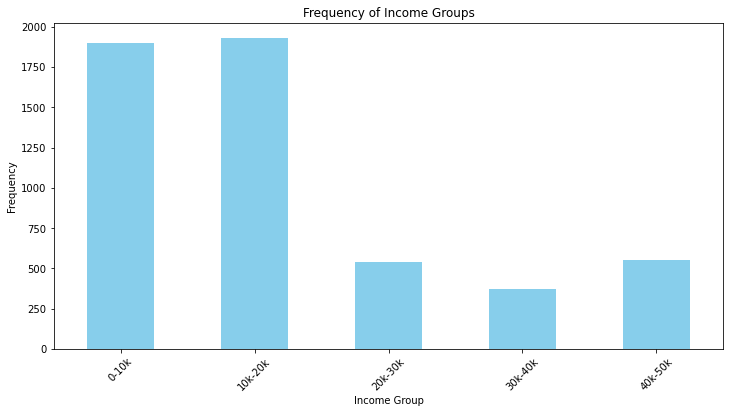

In [24]:
# Plot the distribution of how much paid in last month
# Define the income bins
bins = [0, 10000, 20000, 30000, 40000,float('inf')]
bin_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k']

# Bin the income data
df['income_group'] = pd.cut(df['how much paid in last month.1'], bins=bins, labels=bin_labels, right=False)

# Count the frequencies of each income group
income_group_counts = df['income_group'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Frequency of Income Groups')
plt.xticks(rotation=45)
plt.show()


**Highest earning salary is between 40k to 50k**

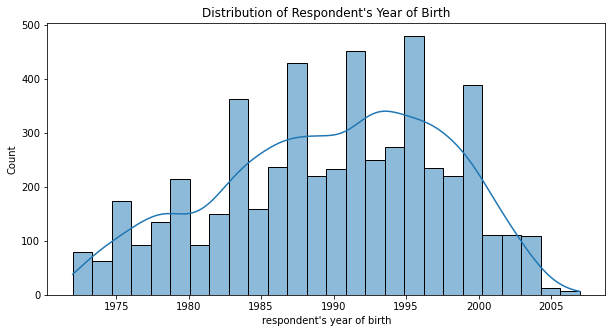

In [25]:
# Plot distribution of Respondent's Year of birth
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x= 'respondent\'s year of birth', kde=True)
plt.title('Distribution of Respondent\'s Year of Birth')
plt.show()

**Majority of the workers in the informal sector are born around 1995**

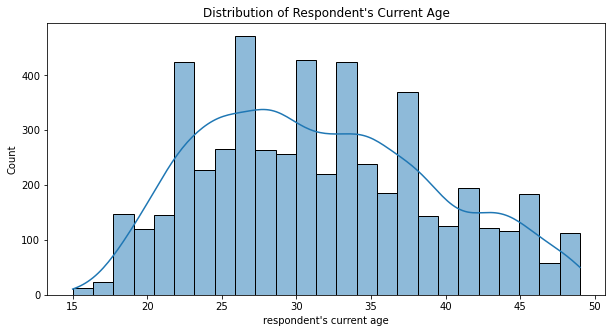

In [26]:
# Plot distribution of Respondent's Current Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='respondent\'s current age', kde=True)
plt.title('Distribution of Respondent\'s Current Age')
plt.show()

**Majority of the informal sector workers are around the age of 26**

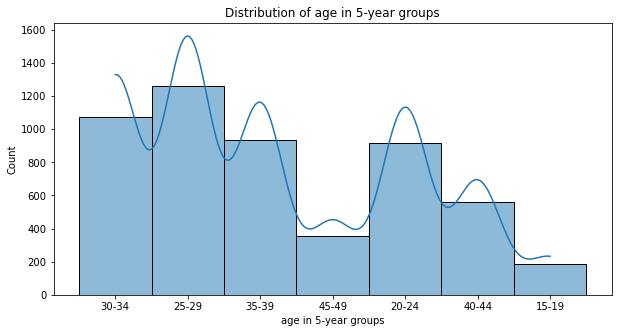

In [27]:
# Plot distribution of age in 5-year groups
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age in 5-year groups', kde=True)
plt.title('Distribution of age in 5-year groups')
plt.show()

**The largest age group in working in the informal sector is between the ages of 25 to 29 years**

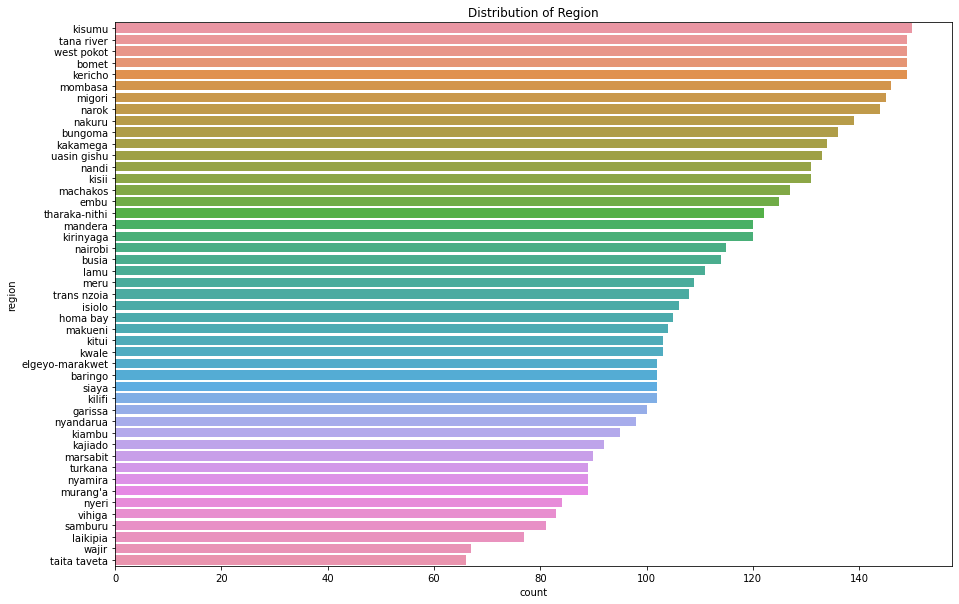

In [28]:
# Plot distribution of Region
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index)
plt.title('Distribution of Region')
plt.show()

**The region that with the highest number informal sector workers is Kisumu while the least is Taita Taveta**

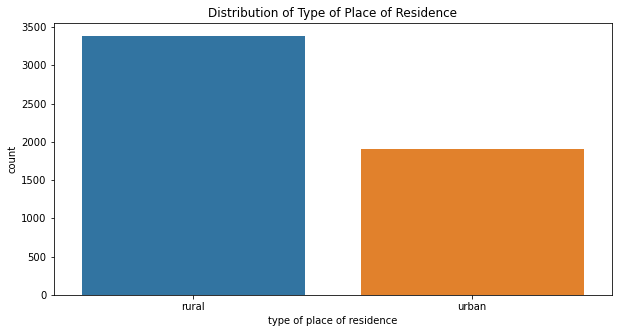

In [29]:
# Plot distribution of Type of Place of Residence
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type of place of residence', order=df['type of place of residence'].value_counts().index)
plt.title('Distribution of Type of Place of Residence')
plt.show()

**Majority of the informal sector workers live in rural areas**

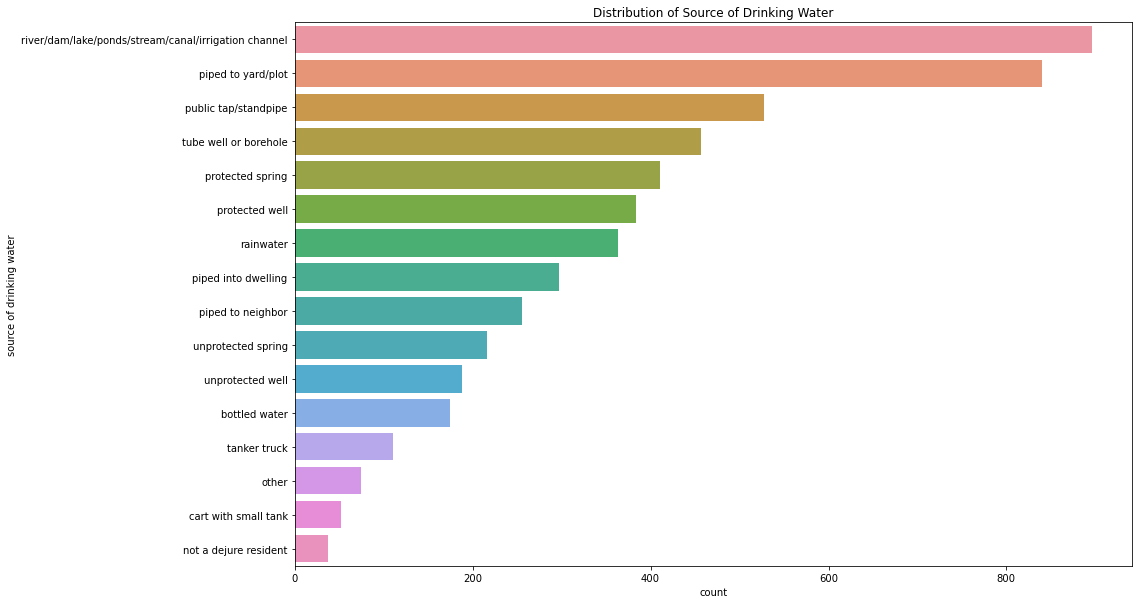

In [30]:
# Plot distribution of Source of Drinking Water
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='source of drinking water', order=df['source of drinking water'].value_counts().index)
plt.title('Distribution of Source of Drinking Water')
plt.show()

**Majority of the informal sector workers het their drinking water from the river/dam/lake/ponds/stream/Canal/irrigation chanel**

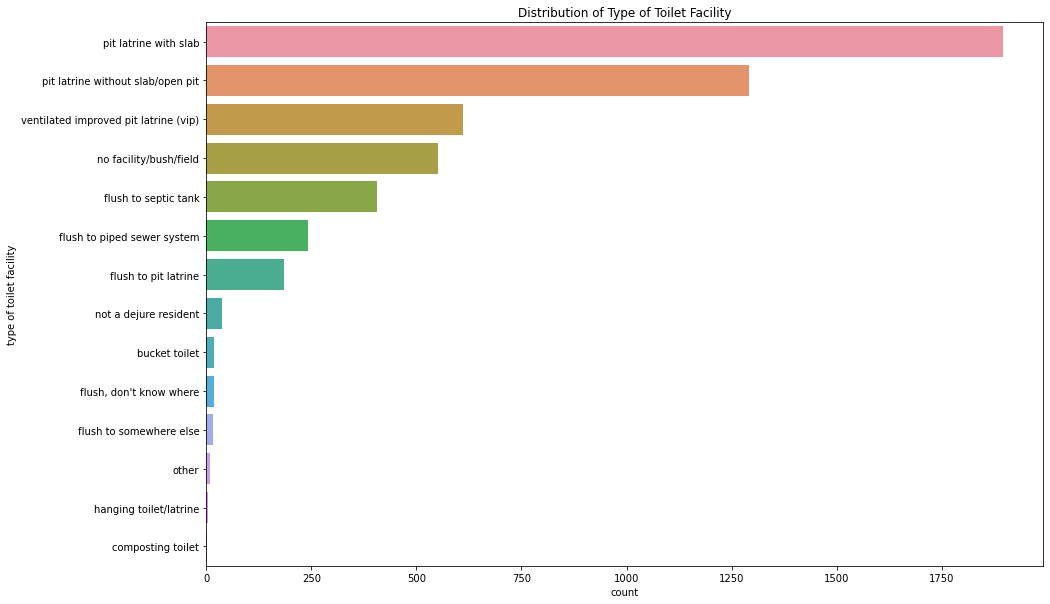

In [31]:
# Plot distribution of Type of Toilet Facility
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of toilet facility', order=df['type of toilet facility'].value_counts().index)
plt.title('Distribution of Type of Toilet Facility')
plt.show()

**Majority of informal sector workers use pit latrines with slabs**

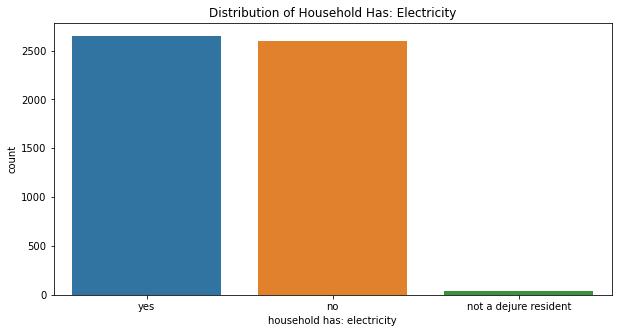

In [32]:
# Plot distribution of Household Has: Electricity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: electricity', order=df['household has: electricity'].value_counts().index)
plt.title('Distribution of Household Has: Electricity')
plt.show()

**The informal sector workers all have equal numbers of households who have electricity and those without**

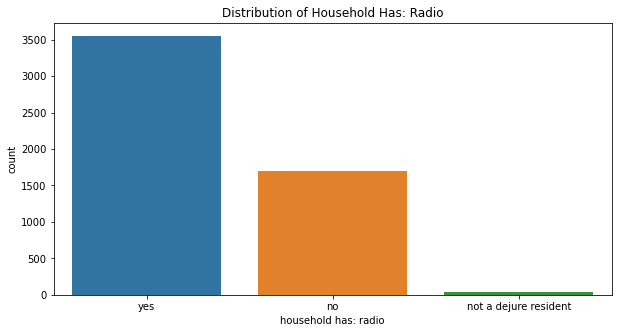

In [33]:
# Plot distribution of Household Has: Radio
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: radio', order=df['household has: radio'].value_counts().index)
plt.title('Distribution of Household Has: Radio')
plt.show()

**Majority of the informal sector workers households have radios**

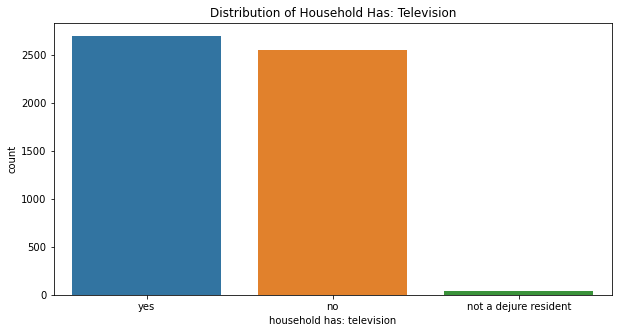

In [34]:
# Plot distribution of Household Has: television
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: television', order=df['household has: television'].value_counts().index)
plt.title('Distribution of Household Has: Television')
plt.show()

**Majority of the informal sector workers households have Televisions**

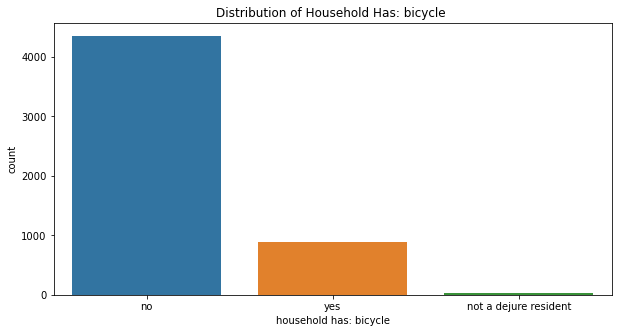

In [35]:
# Plot distribution of Household Has: bicycle
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: bicycle', order=df['household has: bicycle'].value_counts().index)
plt.title('Distribution of Household Has: bicycle ')
plt.show()

**Majority of the informal sector workers households have no bicycles**

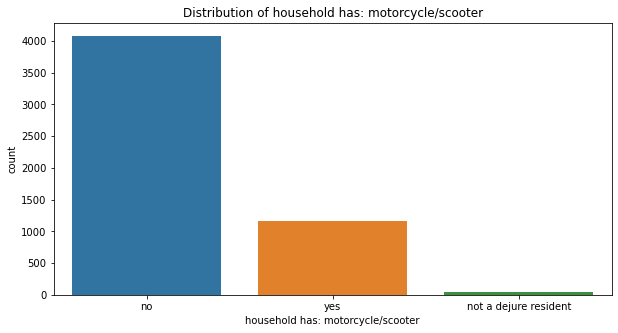

In [36]:
# Plot distribution of household has: motorcycle/scooter
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: motorcycle/scooter', order=df['household has: motorcycle/scooter'].value_counts().index)
plt.title('Distribution of household has: motorcycle/scooter')
plt.show()

**Majority of the informal sector workers households have no motorcycle/scooter**

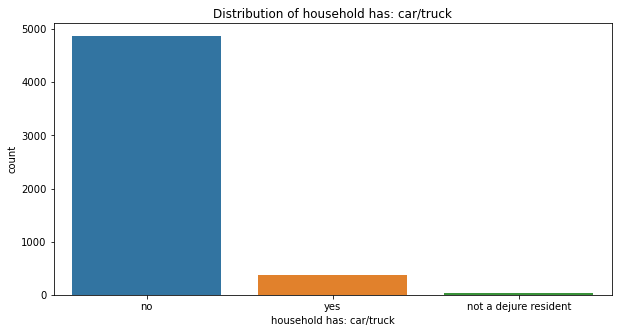

In [37]:
# Plot distribution of household has: car/truck
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: car/truck', order=df['household has: car/truck'].value_counts().index)
plt.title('Distribution of household has: car/truck')
plt.show()

**Majority of the informal sector workers households have no cars/trucks**

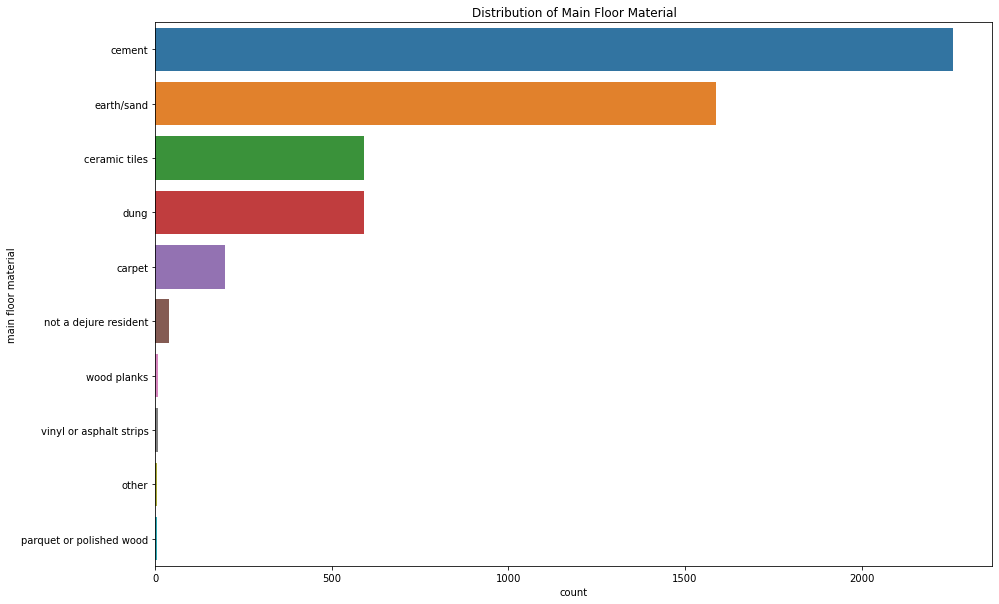

In [38]:
# Plot distribution of Main Floor Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main floor material', order=df['main floor material'].value_counts().index)
plt.title('Distribution of Main Floor Material')
plt.show()

**Majority of the informal sector workers live in houses with cement floors**

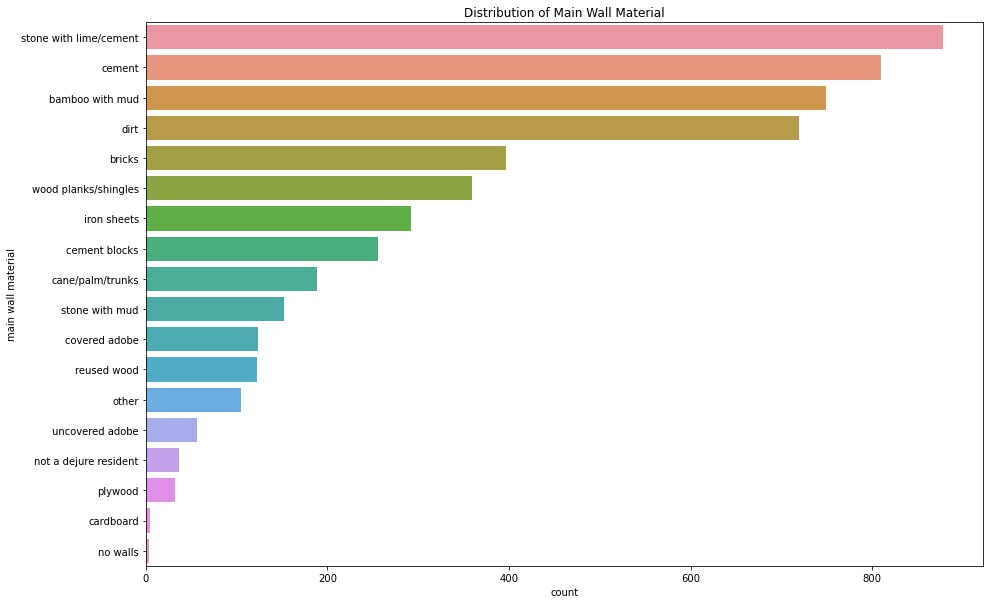

In [39]:
# Plot distribution of Main Wall Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main wall material', order=df['main wall material'].value_counts().index)
plt.title('Distribution of Main Wall Material')
plt.show()

**Majority of the informal sector workers live in houses with walls made of stone with lime/cement**

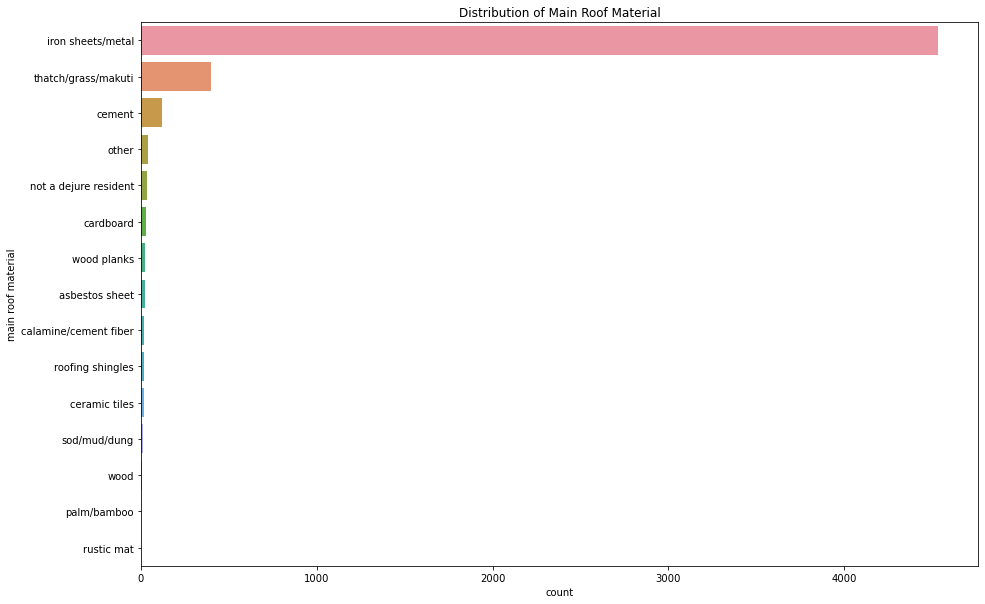

In [40]:
# Plot distribution of Main Roof Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main roof material', order=df['main roof material'].value_counts().index)
plt.title('Distribution of Main Roof Material')
plt.show()

**Majority of the informal sector workers live in houses with roofs made of iron sheets/metal**

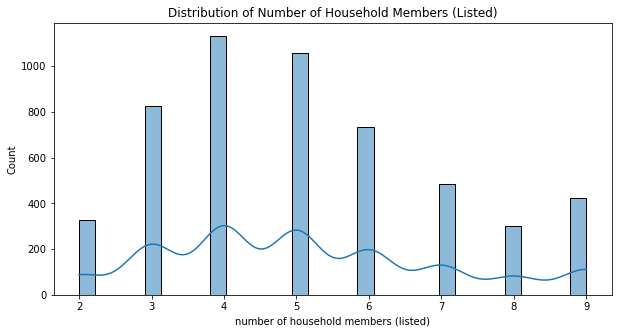

In [41]:
# Plot distribution of Number of Household Members (Listed)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of household members (listed)', kde=True)
plt.title('Distribution of Number of Household Members (Listed)')
plt.show()

**Majority of the households have 4 members**

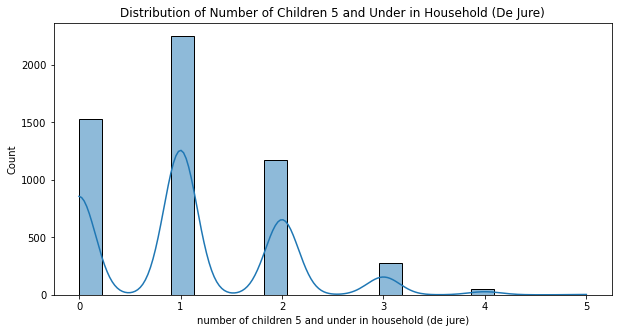

In [42]:
# Plot distribution of Number of Children 5 and Under in Household (De Jure)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of children 5 and under in household (de jure)', kde=True)
plt.title('Distribution of Number of Children 5 and Under in Household (De Jure)')
plt.show()

**Majority of the households have 1 child under the age of 5 years**

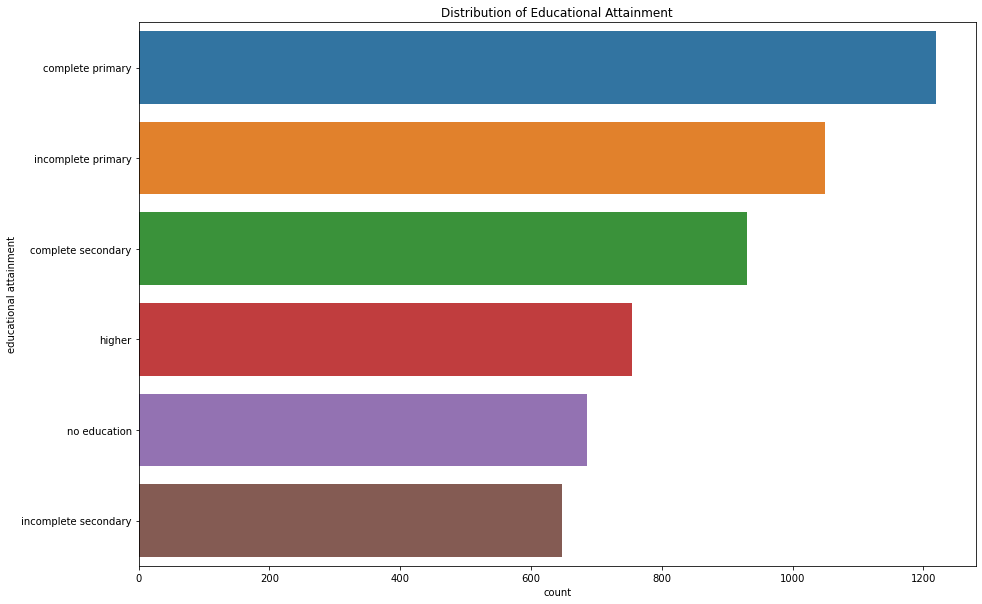

In [43]:
# Plot distribution of Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment', order=df['educational attainment'].value_counts().index)
plt.title('Distribution of Educational Attainment')
plt.show()

**Majortiy of the workers finished primary school but not highschool and the ones who finshed highschool school very few got higher education**

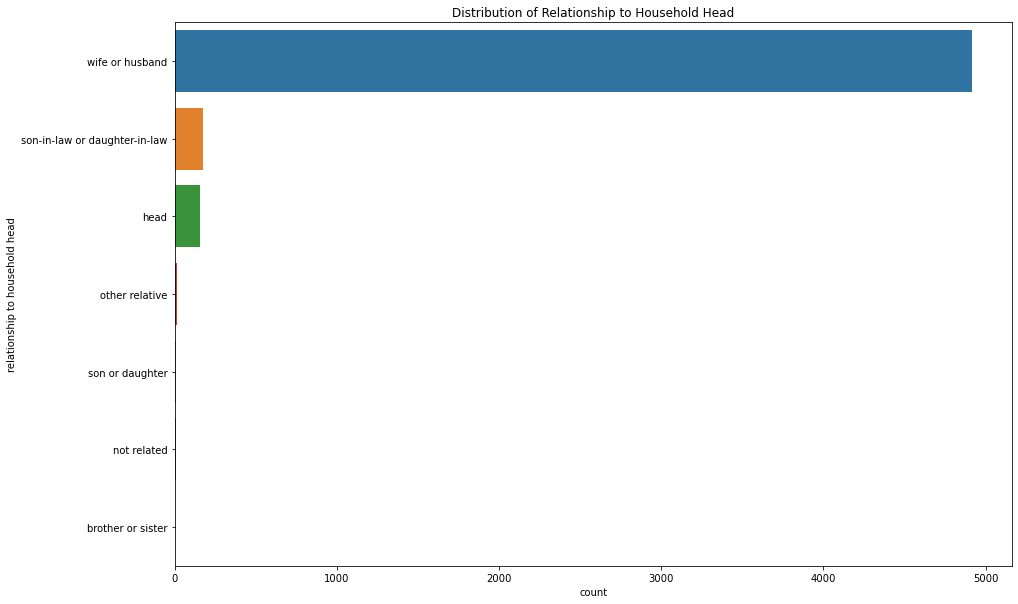

In [44]:
# Plot distribution of Relationship to Household Head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='relationship to household head', order=df['relationship to household head'].value_counts().index)
plt.title('Distribution of Relationship to Household Head')
plt.show()

**Majority of them workers live with either their husband or wife**

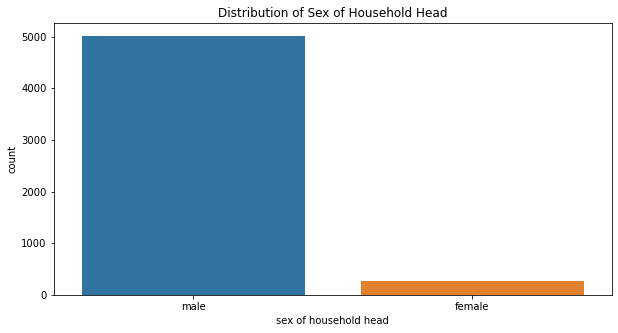

In [45]:
# Plot distribution of Sex of Household Head
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex of household head', order=df['sex of household head'].value_counts().index)
plt.title('Distribution of Sex of Household Head')
plt.show()

**Majority of the household heads are male**

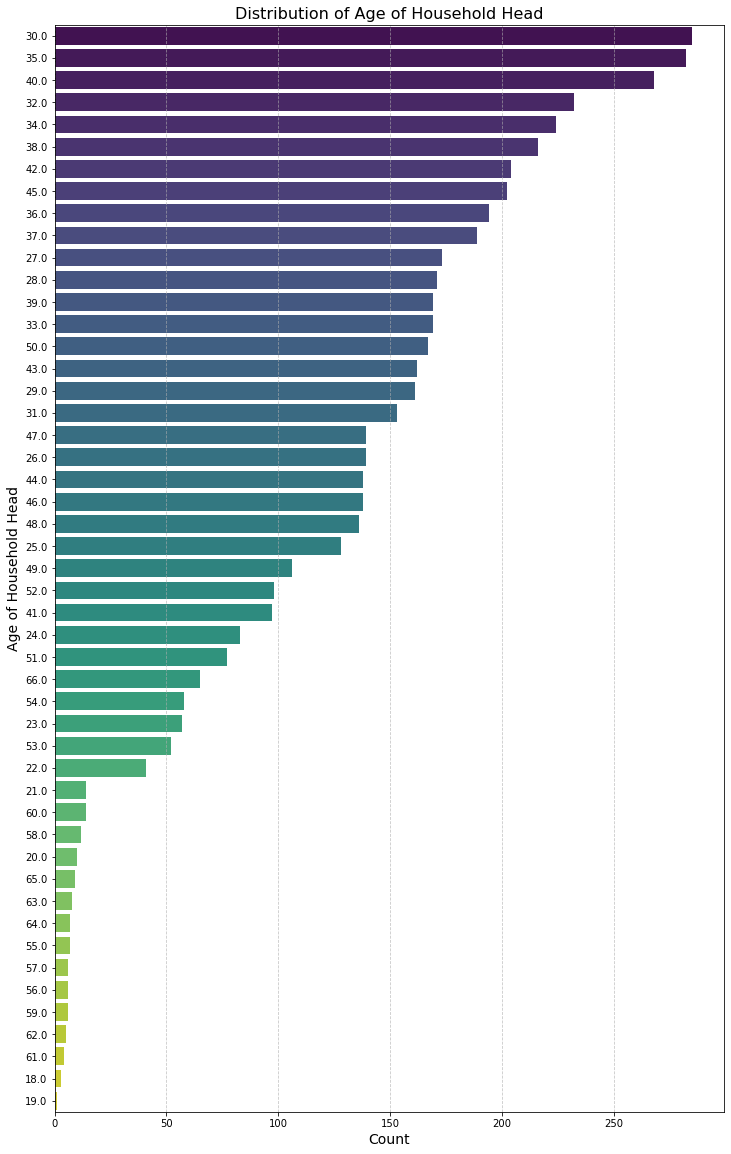

In [46]:
# Plot distribution of Age of Household Head
plt.figure(figsize=(12, 20))

# Countplot with enhanced aesthetics
sns.countplot(data=df, y='age of household head', order=df['age of household head'].value_counts().index, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Age of Household Head', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age of Household Head', fontsize=14)

# Adding gridlines for better visual reference
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**Majority of the household heads are 33 years old**

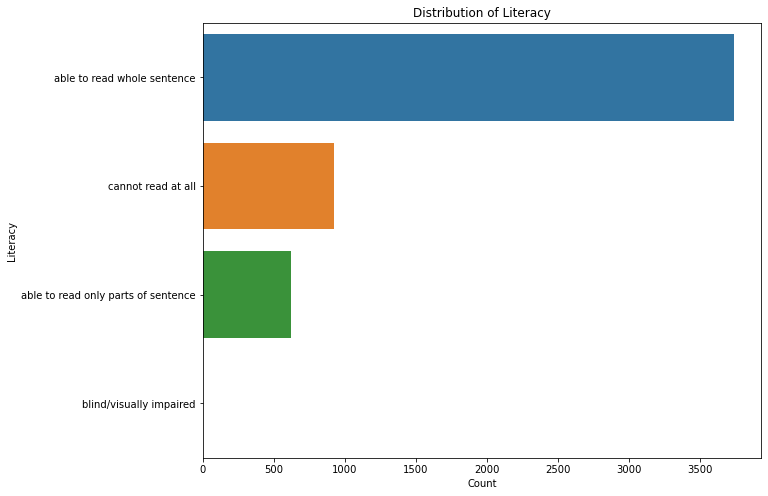

In [47]:
# Plot distribution of Literacy
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='literacy', order=df['literacy'].value_counts().index, orient='h')
plt.title('Distribution of Literacy')
plt.xlabel('Count')
plt.ylabel('Literacy')
plt.show()

**Majority of the workers can be literate as they are able to read whole sentence**

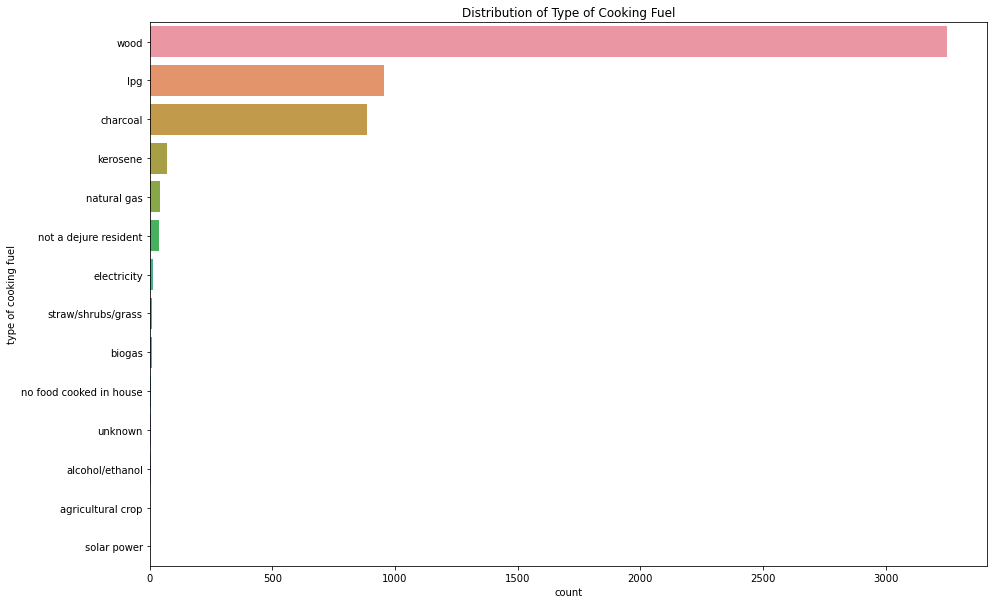

In [48]:
# Plot distribution of Type of Cooking Fuel
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of cooking fuel', order=df['type of cooking fuel'].value_counts().index)
plt.title('Distribution of Type of Cooking Fuel')
plt.show()

**Majority of the workers use Wood as cooking fuel**

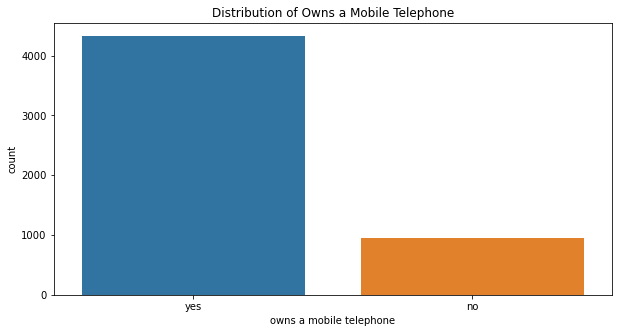

In [49]:
# Plot distribution of Owns a Mobile Telephone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='owns a mobile telephone', order=df['owns a mobile telephone'].value_counts().index)
plt.title('Distribution of Owns a Mobile Telephone')
plt.show()

**Majority of the workers have Mobile Telephones**

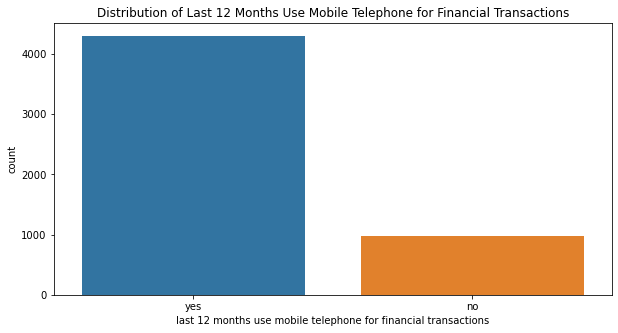

In [50]:
# Plot distribution of Last 12 Months Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='last 12 months use mobile telephone for financial transactions', order=df['last 12 months use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Last 12 Months Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers in the Last 12 Months Use Mobile Telephone for Financial Transactions**

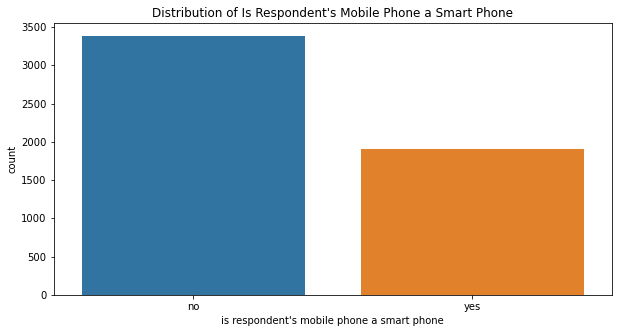

In [51]:
# Plot distribution of Is Respondent's Mobile Phone a Smart Phone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is respondent\'s mobile phone a smart phone', order=df['is respondent\'s mobile phone a smart phone'].value_counts().index)
plt.title('Distribution of Is Respondent\'s Mobile Phone a Smart Phone')
plt.show()

**Majority of the workers phones are not smart phones**

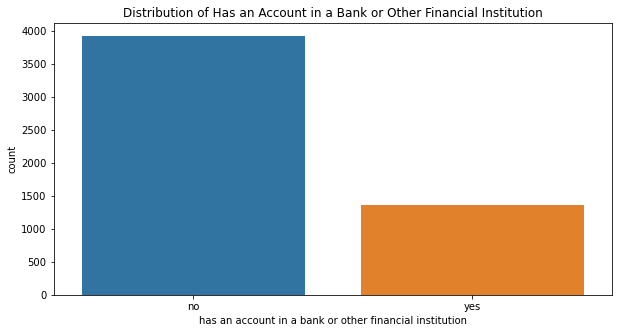

In [52]:
# Plot distribution of Has an Account in a Bank or Other Financial Institution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has an account in a bank or other financial institution', order=df['has an account in a bank or other financial institution'].value_counts().index)
plt.title('Distribution of Has an Account in a Bank or Other Financial Institution')
plt.show()

**Majority of the workers do not have an account in a bank or other financial institution**

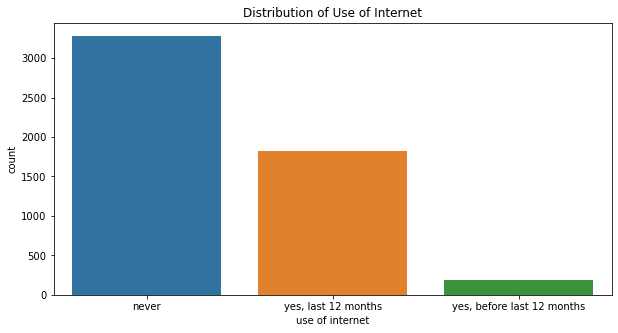

In [53]:
# Plot distribution of Use of Internet
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use of internet', order=df['use of internet'].value_counts().index)
plt.title('Distribution of Use of Internet')
plt.show()

**Majority of the workers have never used the internet**

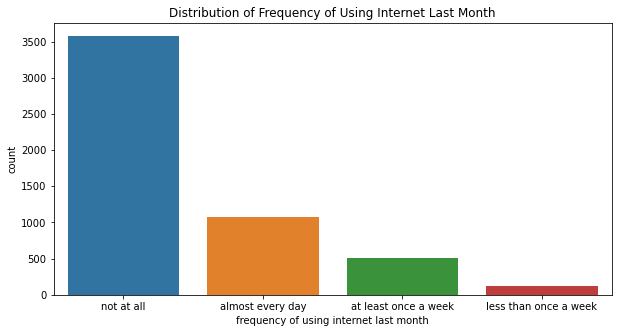

In [54]:
# Plot distribution of Frequency of Using Internet Last Month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='frequency of using internet last month', order=df['frequency of using internet last month'].value_counts().index)
plt.title('Distribution of Frequency of Using Internet Last Month')
plt.show()

**Majority of the workers did not use the interent at all in the last month**

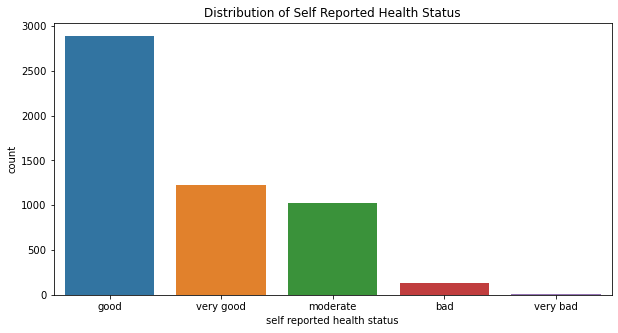

In [55]:
# Plot distribution of Self Reported Health Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='self reported health status', order=df['self reported health status'].value_counts().index)
plt.title('Distribution of Self Reported Health Status')
plt.show()

**Majority of the workers reported their health status as good**

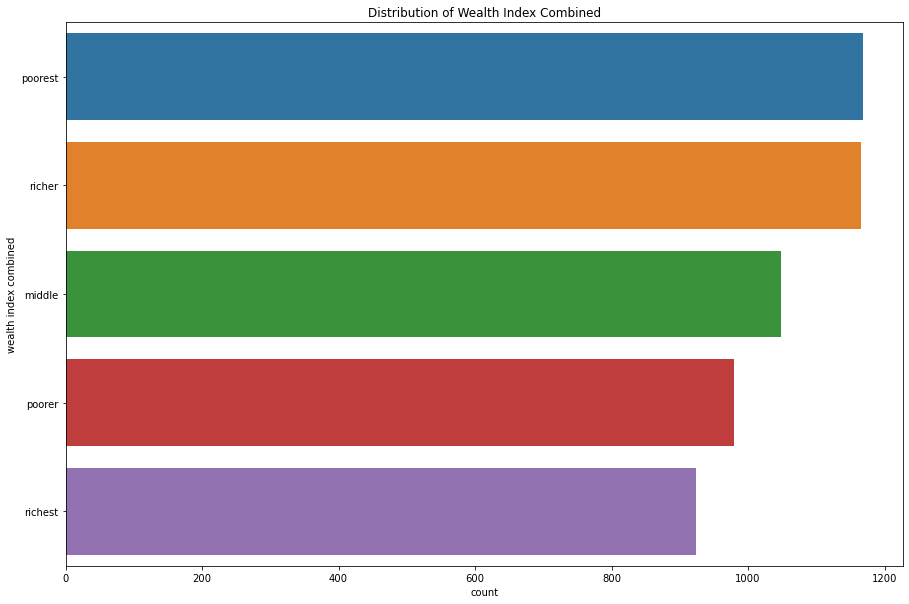

In [56]:
# Plot distribution of Wealth Index Combined
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='wealth index combined', order=df['wealth index combined'].value_counts().index)
plt.title('Distribution of Wealth Index Combined')
plt.show()

**Majority of the workers are extremely poor**

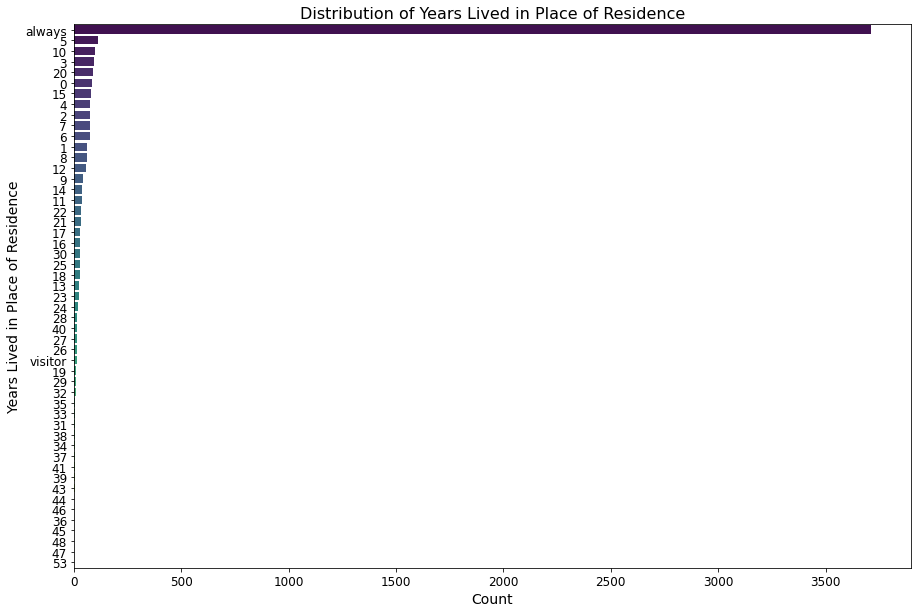

In [57]:
# Plot distribution of Years Lived in Place of Residence
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='years lived in place of residence', order=df['years lived in place of residence'].value_counts().index, palette='viridis')

plt.title('Distribution of Years Lived in Place of Residence', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Years Lived in Place of Residence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Majority of the workers have always lived in the same place**

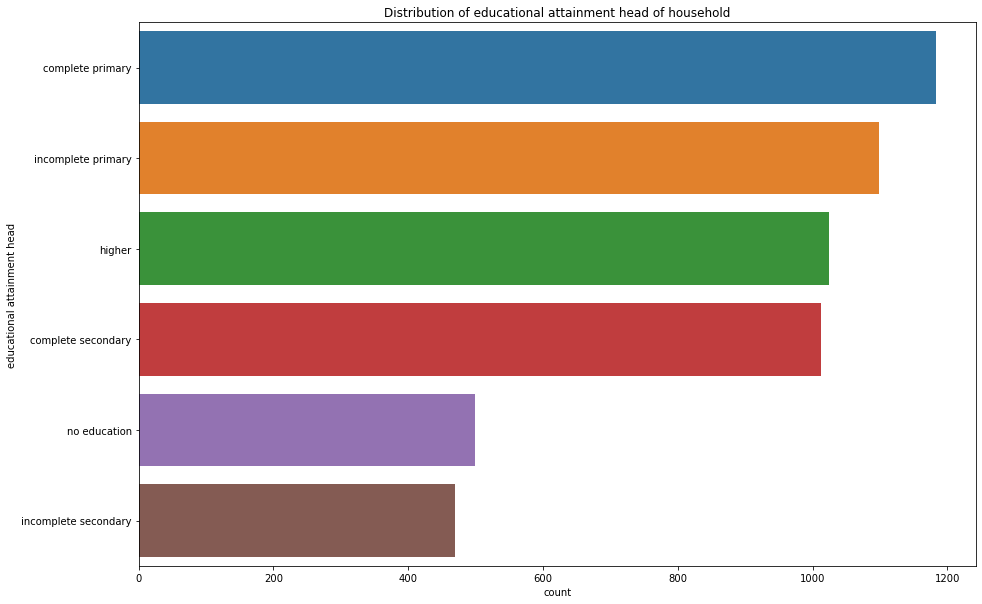

In [58]:
# Plot distribution of Educational attainment head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment head', order=df['educational attainment head'].value_counts().index)
plt.title('Distribution of educational attainment head of household')
plt.show()

**Majority of the household heads completed primary and very few completed high school.For those who completed highschool almost all got higher education**

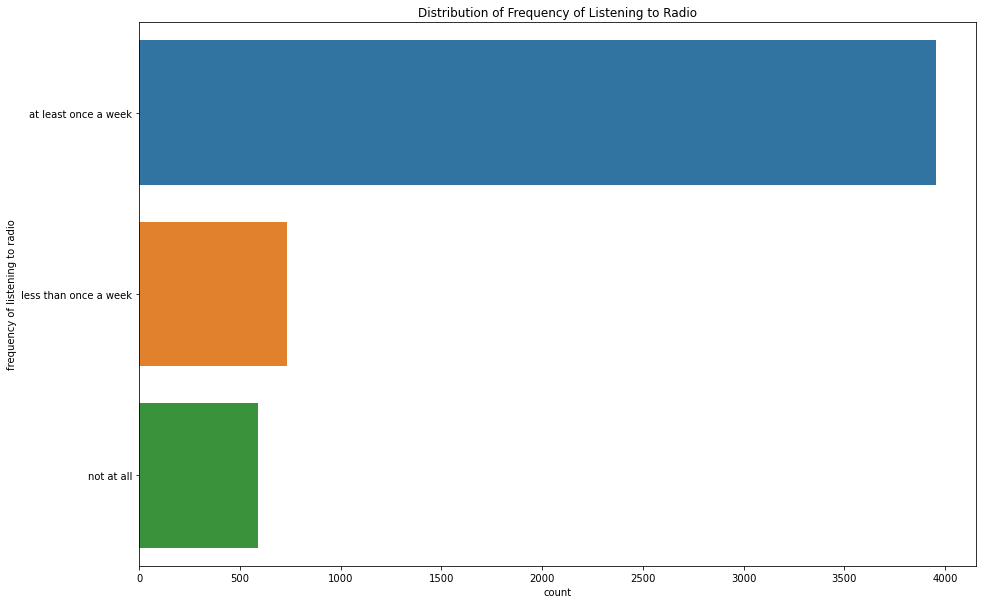

In [59]:
# Plot distribution of Frequency of Listening to Radio
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of listening to radio', order=df['frequency of listening to radio'].value_counts().index)
plt.title('Distribution of Frequency of Listening to Radio')
plt.show()

**Majority of the workers listen to the radio atleast once a week**

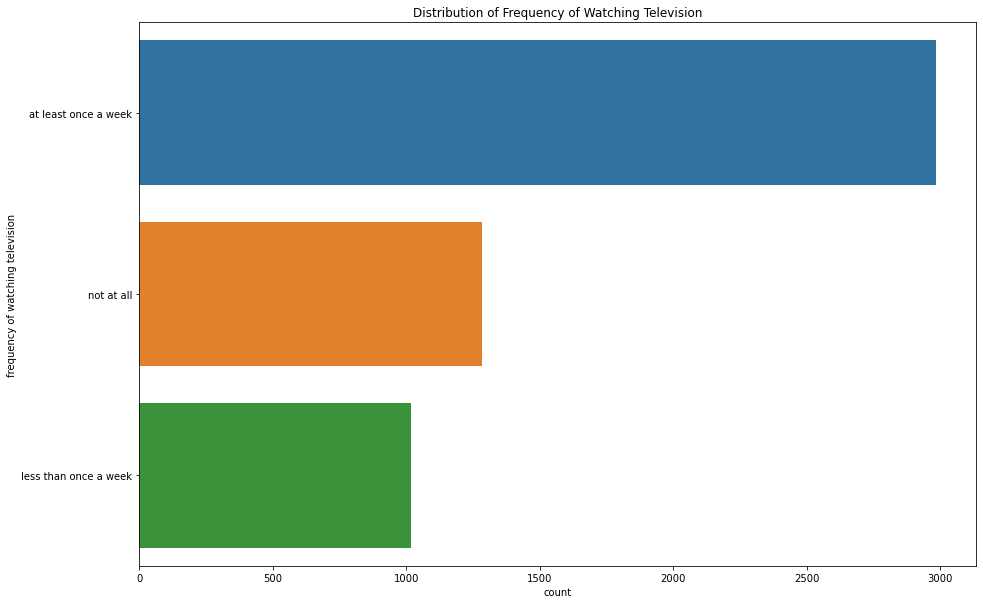

In [60]:
# Plot distribution of Frequency of Watching Television
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of watching television', order=df['frequency of watching television'].value_counts().index)
plt.title('Distribution of Frequency of Watching Television')
plt.show()

**Majority of the workers watch television atleast once a week**

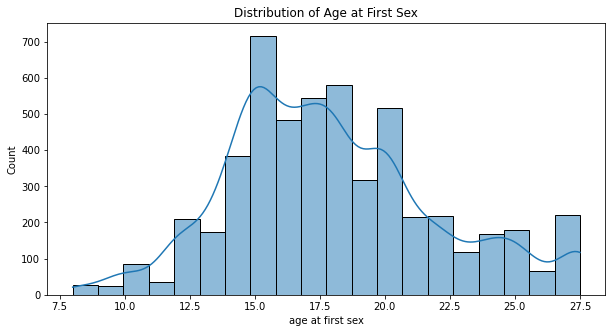

In [61]:
# Plot distribution of Age at First Sex
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age at first sex', bins=20, kde=True)
plt.title('Distribution of Age at First Sex')
plt.show()

**Majority of the workers first had sex at the age of 16 and 17**

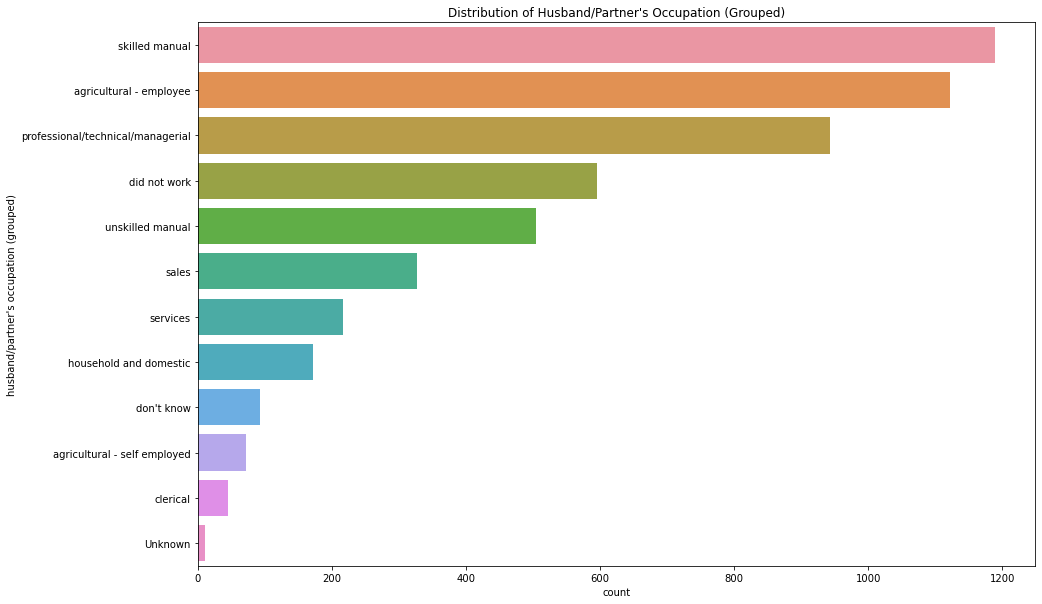

In [62]:
# Plot distribution of Husband/Partner's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s occupation (grouped)', order=df['husband/partner\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Occupation (Grouped)')
plt.show()

**Majority of the wrokers Husband/Partner's are skilled manually**

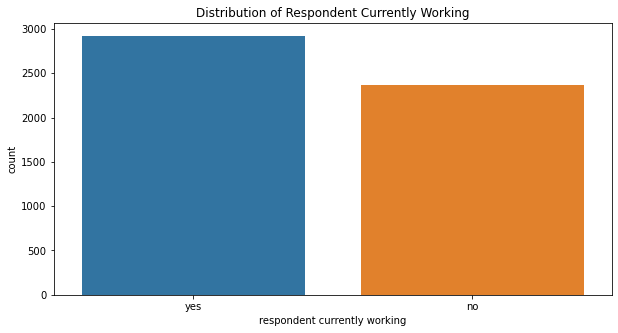

In [63]:
# Plot distribution of Respondent Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent currently working', order=df['respondent currently working'].value_counts().index)
plt.title('Distribution of Respondent Currently Working')
plt.show()

**Majority of the Respondent are Currently Working**

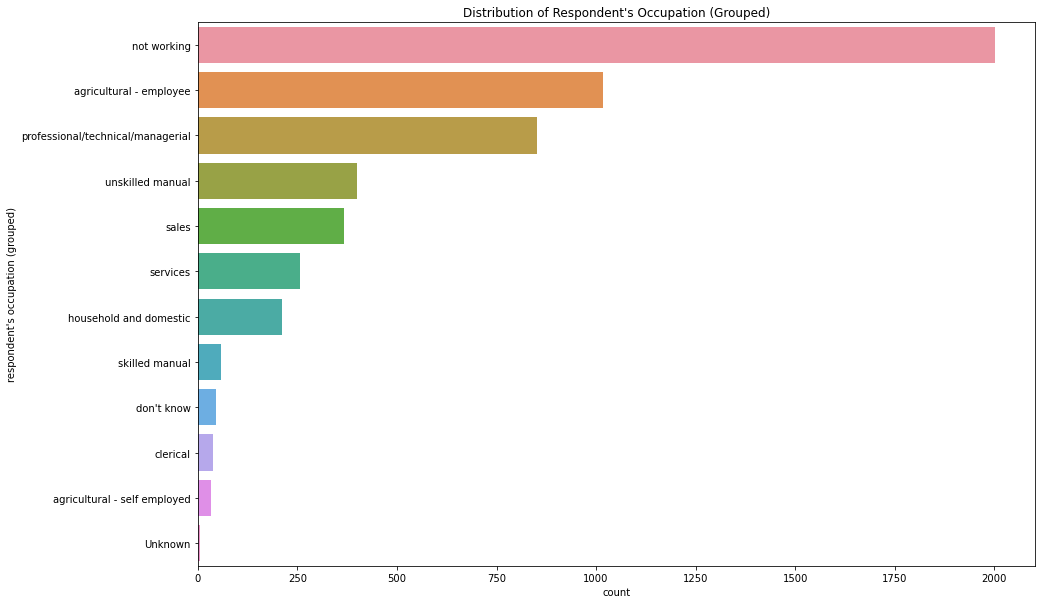

In [64]:
# Plot distribution of Respondent's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent\'s occupation (grouped)', order=df['respondent\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Respondent\'s Occupation (Grouped)')
plt.show()

**Majority of the Respondent's are not working**

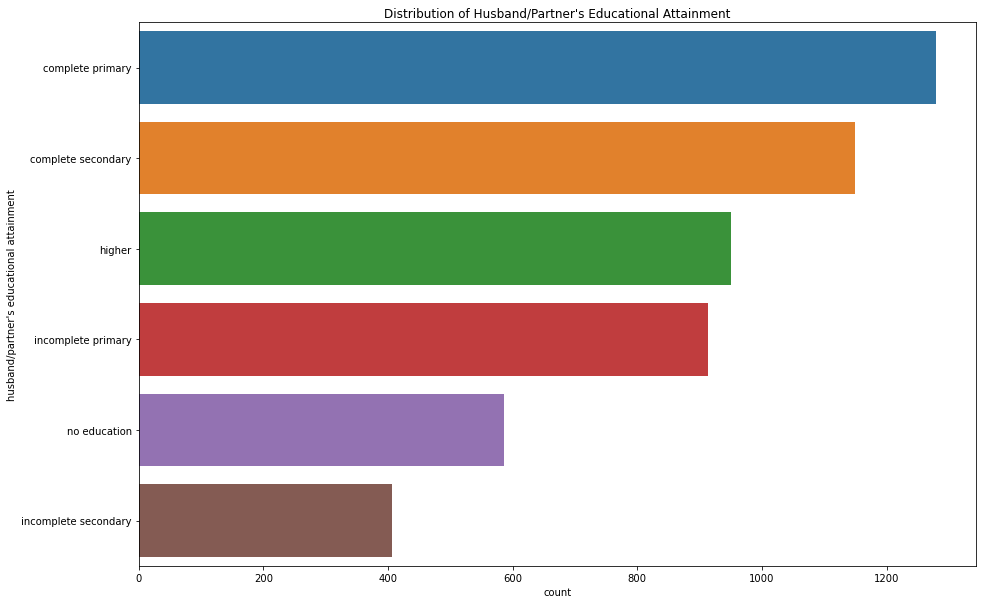

In [65]:
# Plot distribution of Husband/Partner's Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s educational attainment', order=df['husband/partner\'s educational attainment'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Educational Attainment')
plt.show()

**Majority of the workers patners finished primary but very few got to highschool and even fewer got higher education**

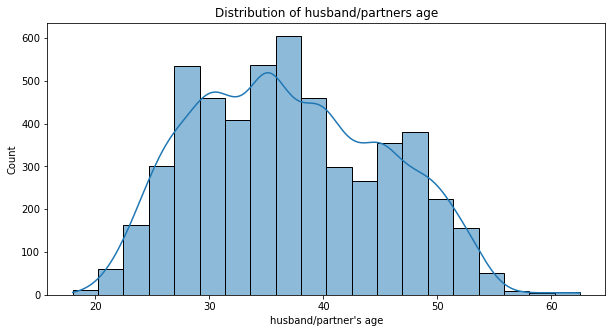

In [66]:
# Plot distribution of husband/partners age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="husband/partner's age", bins=20, kde=True)
plt.title('Distribution of husband/partners age')
plt.show()

**Majority of the patners are between the ages of 30 and 40 years**

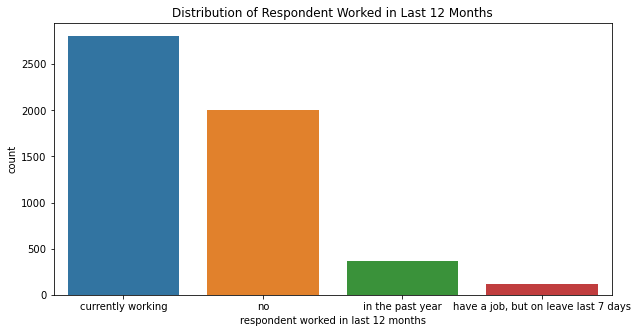

In [67]:
# Plot distribution of Respondent Worked in Last 12 Months
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent worked in last 12 months', order=df['respondent worked in last 12 months'].value_counts().index)
plt.title('Distribution of Respondent Worked in Last 12 Months')
plt.show()

**Majority of Respondent in the Last 12 Months have been working**

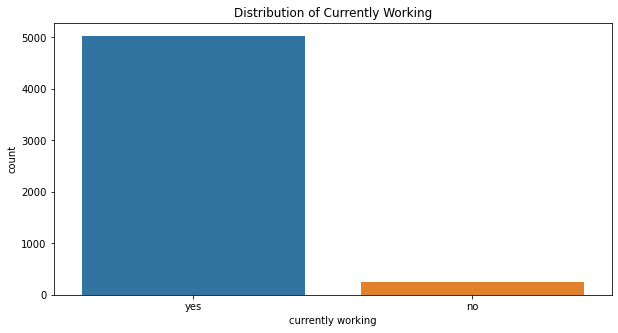

In [68]:
# Plot distribution of Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='currently working', order=df['currently working'].value_counts().index)
plt.title('Distribution of Currently Working')
plt.show()

**Majority are currently working**

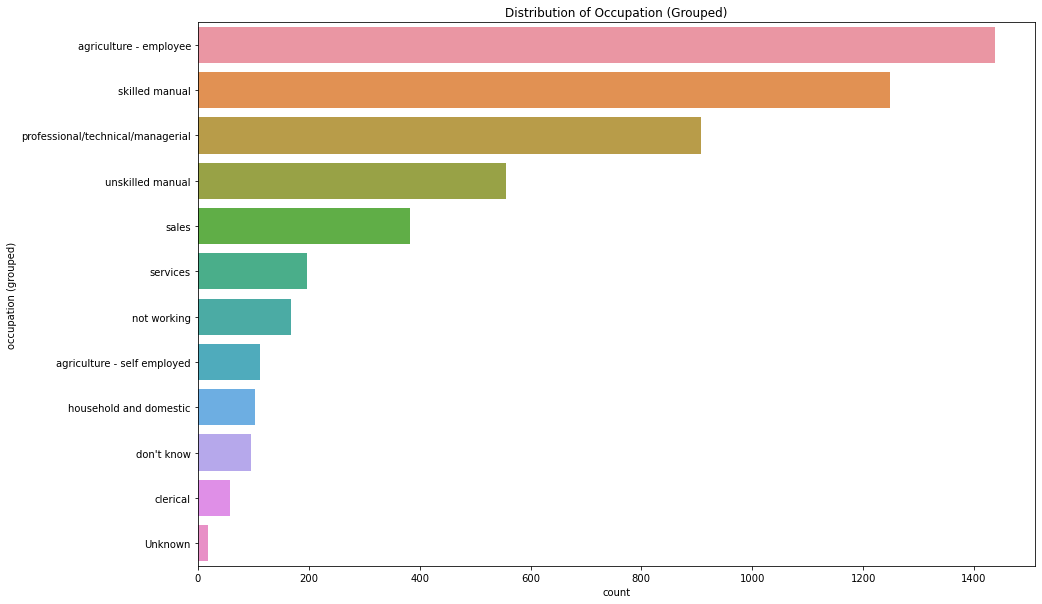

In [69]:
# Plot distribution of Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='occupation (grouped)', order=df['occupation (grouped)'].value_counts().index)
plt.title('Distribution of Occupation (Grouped)')
plt.show()

**Majority of the workers work in agriculture as employees**

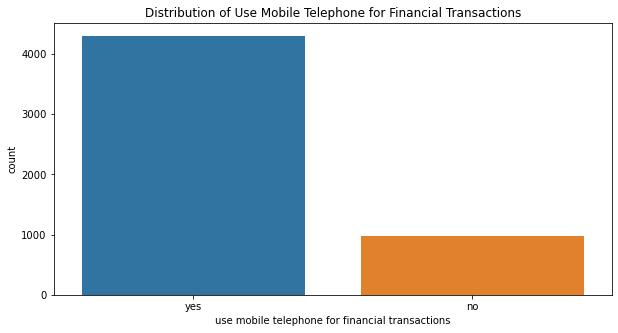

In [70]:
# Plot distribution of Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use mobile telephone for financial transactions', order=df['use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers Use Mobile Telephone for Financial Transactions**

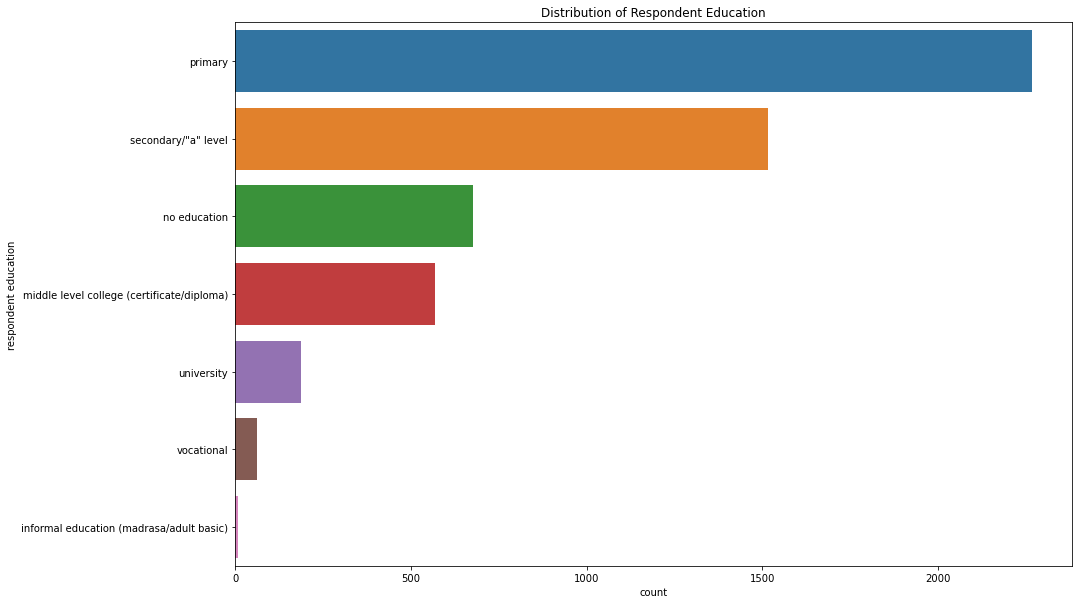

In [71]:
# Plot distribution of Respondent Education
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent education', order=df['respondent education'].value_counts().index)
plt.title('Distribution of Respondent Education')
plt.show()

**Majority of the Respondants completed primary and very few completed high school.For those who completed highschool very few got higher education**

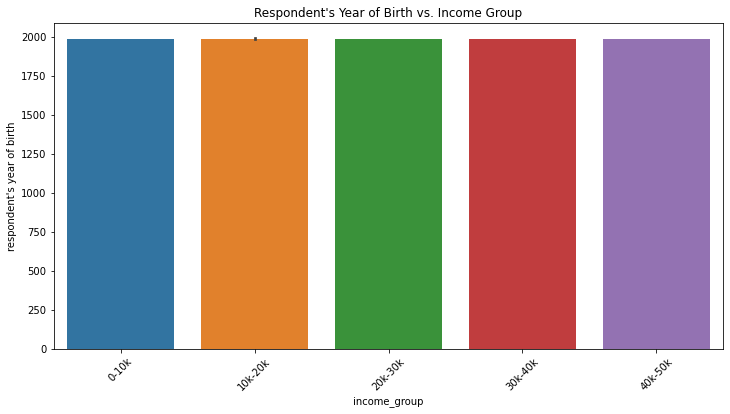

In [72]:
# Respondent's Year of Birth vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y="respondent's year of birth", data=df)
plt.title("Respondent's Year of Birth vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**Respondent's Year of Birth has no impact on their income**

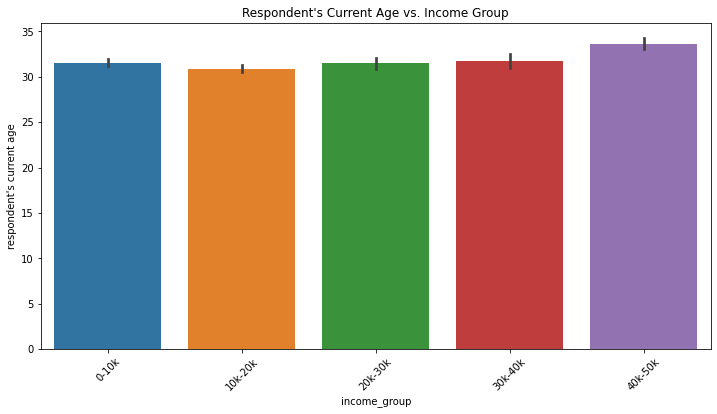

In [73]:
# Respondent's Current Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y="respondent's current age", data=df)
plt.title("Respondent's Current Age vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**Respondent's above the Age of 35 years have more income**

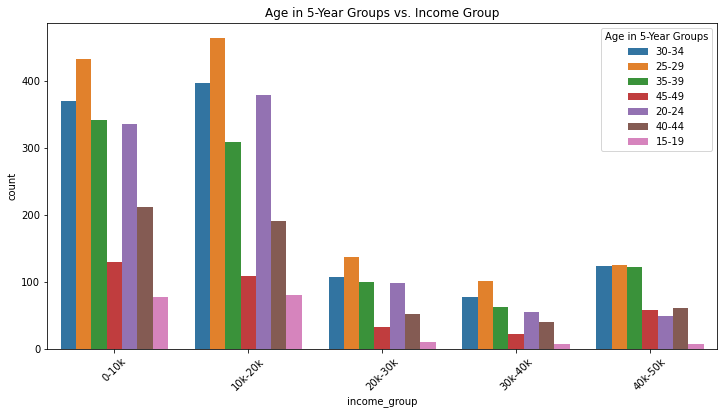

In [74]:
# Age in 5-Year Groups vs. Income Group using Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='age in 5-year groups', data=df)
plt.title("Age in 5-Year Groups vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Age in 5-Year Groups')
plt.show()

**The distribution of income varies across age groups with the 30-34 and 25-29 age ranges having the highest counts across most income groups.**

In [75]:
#  Region vs. Income Group

In [76]:
# Type of place of residence vs. Income group

In [77]:
# Source of drinking water vs. Income group

In [78]:
# Type of toilet facility vs. Income group

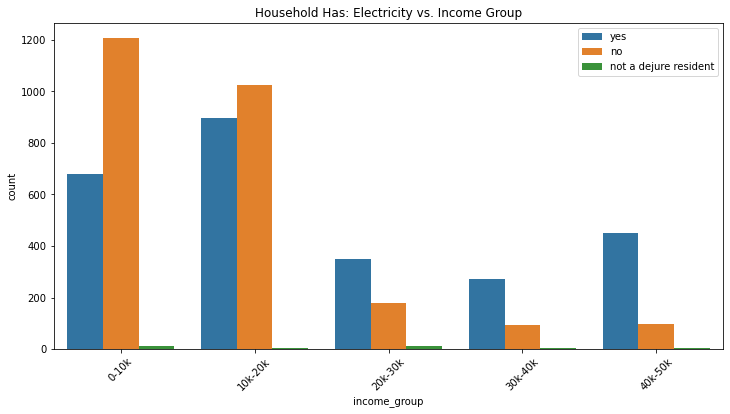

In [79]:
# Household Has: Electricity vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: electricity', data=df)
plt.title("Household Has: Electricity vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of households with electricity is in the high-income group, while the lowest is in the low-income group**

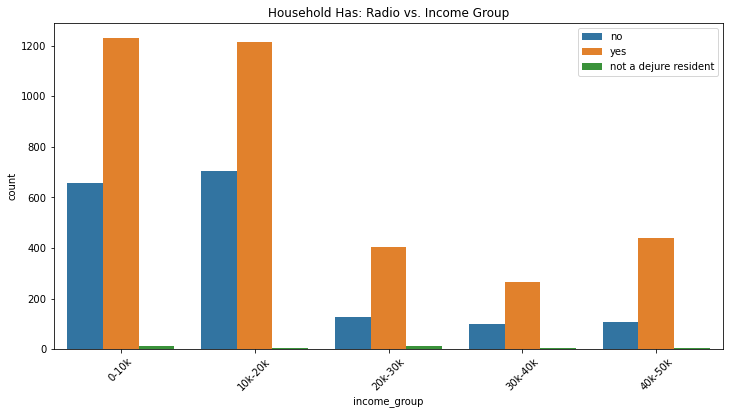

In [80]:
# Household Has: Radio vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: radio', data=df)
plt.title("Household Has: Radio vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with radios is in the 10k-20k income group, while the lowest without radios is in the 30k-40k income group.**

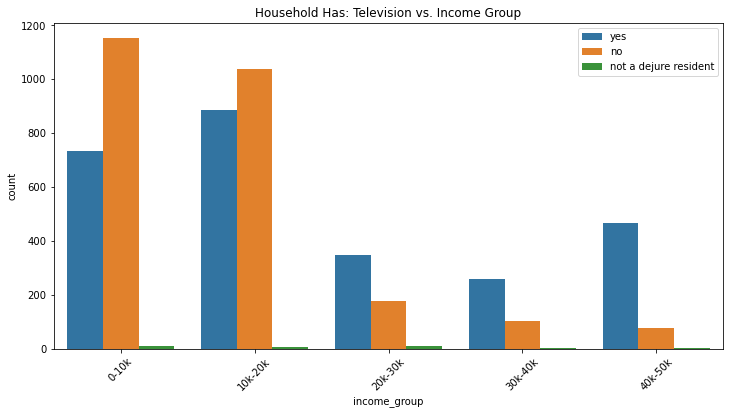

In [81]:
# Household Has: Television vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: television', data=df)
plt.title("Household Has: Television vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with televisions is in the 10k-20k income group, while the lowest televisions is in the 20k-30k income group.**

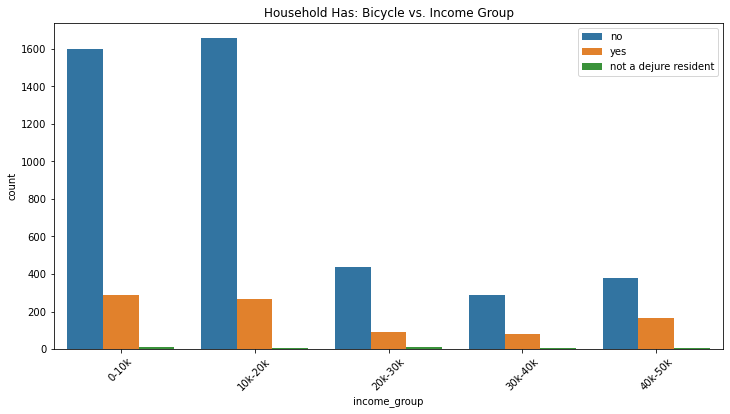

In [82]:
# Household Has: Bicycle vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: bicycle', data=df)
plt.title("Household Has: Bicycle vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with bicycles is in the 10k-20k income group, while the lowest is in the 0-10k and 30k-40k income groups.**

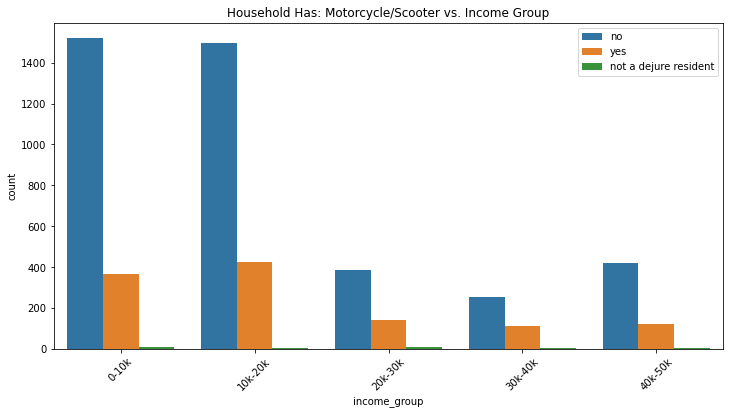

In [83]:
# Household Has: Motorcycle/Scooter vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: motorcycle/scooter', data=df)
plt.title("Household Has: Motorcycle/Scooter vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with motorcycles/scooters is in the 10k-20k income group, while the lowest is in the 0-10k income group.**

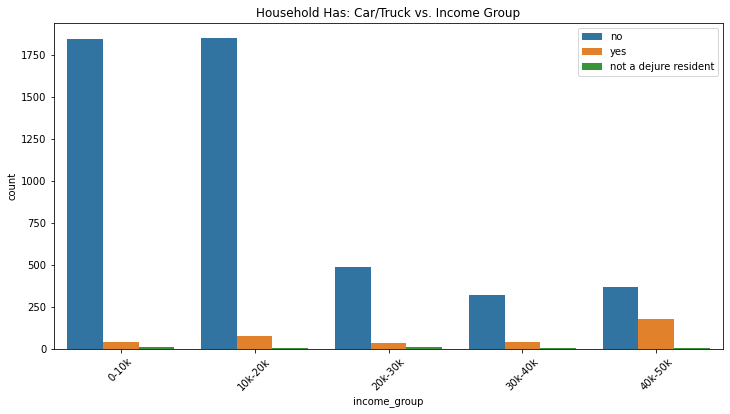

In [84]:
# Household Has: Car/Truck vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: car/truck', data=df)
plt.title("Household Has: Car/Truck vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with cars/trucks is in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

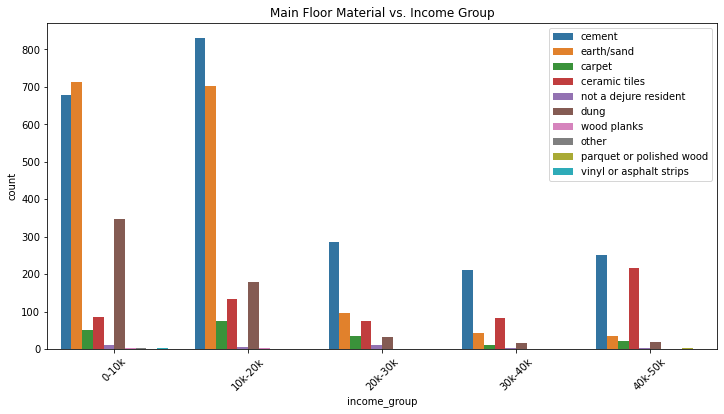

In [85]:
# Plot: Main Floor Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main floor material', data=df)
plt.title("Main Floor Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion have cement floors and the workers in the 10k-20k income group are the highest , while the lowest proportion is in the 40k-50k income group.**

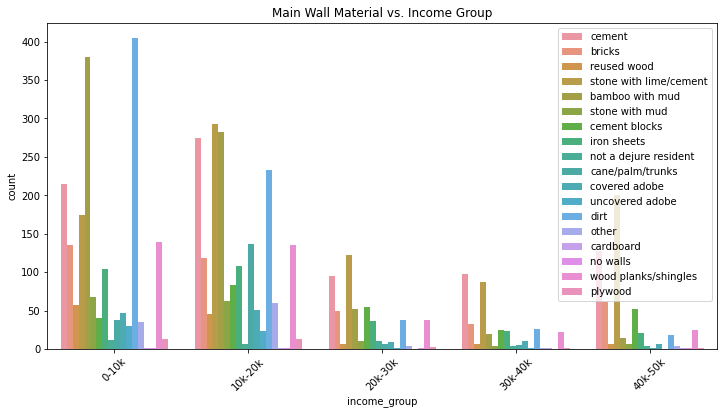

In [86]:
# Main Wall Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main wall material', data=df)
plt.title("Main Wall Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common wall material is mud/unburnt brick.The highest proportion is in the 10k-20k income group, while the lowest proportion is in the 40k-50k income group.**

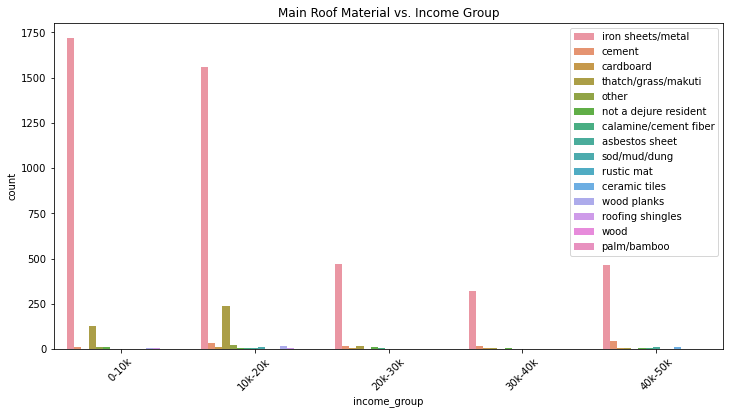

In [87]:
# Main Roof Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main roof material', data=df)
plt.title("Main Roof Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common roof material is iron sheets/metal. The highest proportion is in the 0-10k and 20k-30k income groups, while the lowest is in the 20k-30k and 40k-50k income groups.**

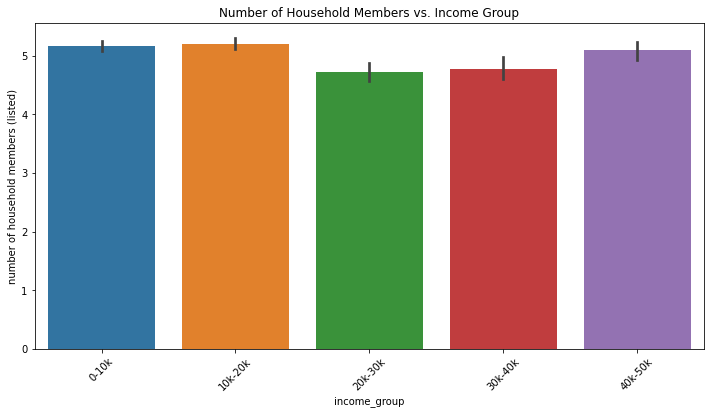

In [88]:
# Number of Household Members vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of household members (listed)', data=df)
plt.title("Number of Household Members vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**The highest number of household members is are in the 0-10k and 10k-20k income groups, while the lowest is in the 20k-30k income group.**

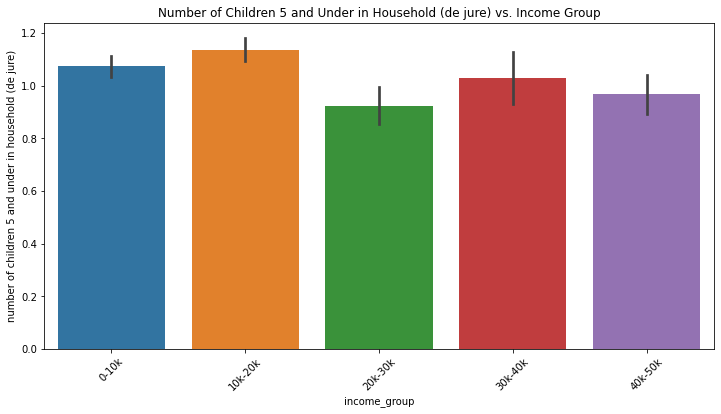

In [89]:
# Number of Children 5 and Under in Household (de jure) vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of children 5 and under in household (de jure)', data=df)
plt.title("Number of Children 5 and Under in Household (de jure) vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average number of children 5 and under have are in the  10k-20k income group, while the lowest is in the 20k-30k income group.**

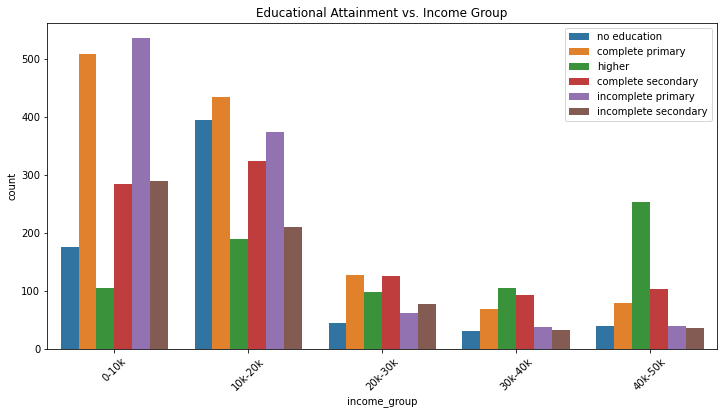

In [90]:
# Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment', data=df)
plt.title("Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of individuals with no education is in the 0-10k income group, while the lowest proportion is in the 40k-50k income group.**

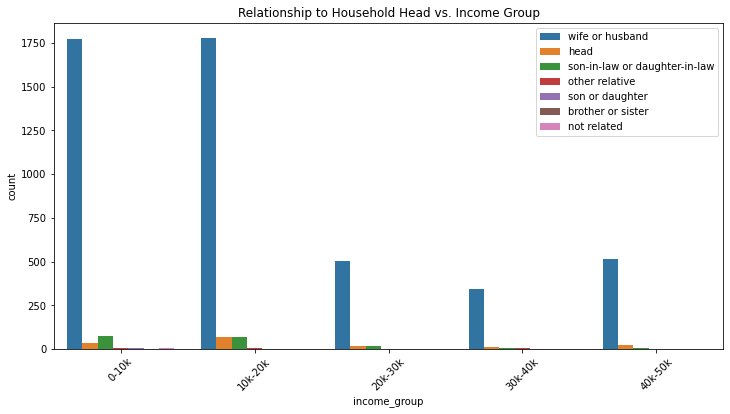

In [91]:
# Relationship to Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='relationship to household head', data=df)
plt.title("Relationship to Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of household heads are in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

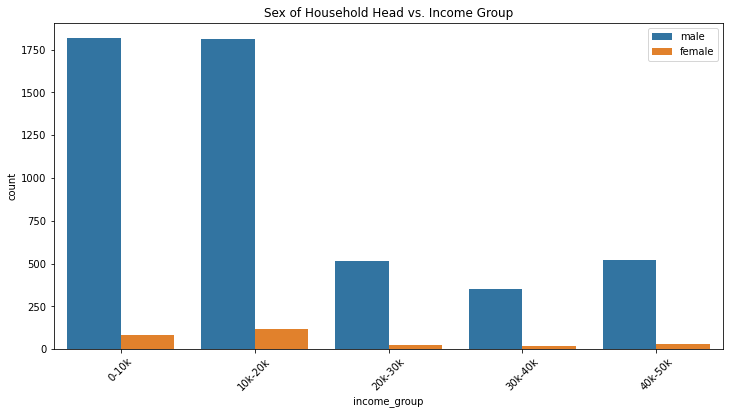

In [92]:
# Sex of Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='sex of household head', data=df)
plt.title("Sex of Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of male household heads are in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

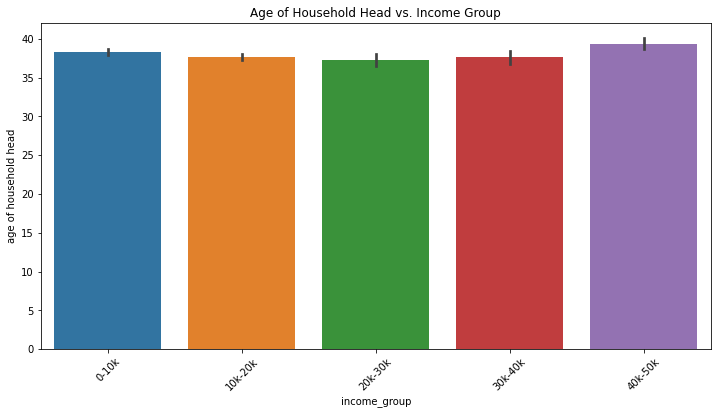

In [93]:
# Age of Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='age of household head', data=df)
plt.title("Age of Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The 35 year old household head are in the 40k-50k income group as the highest.**

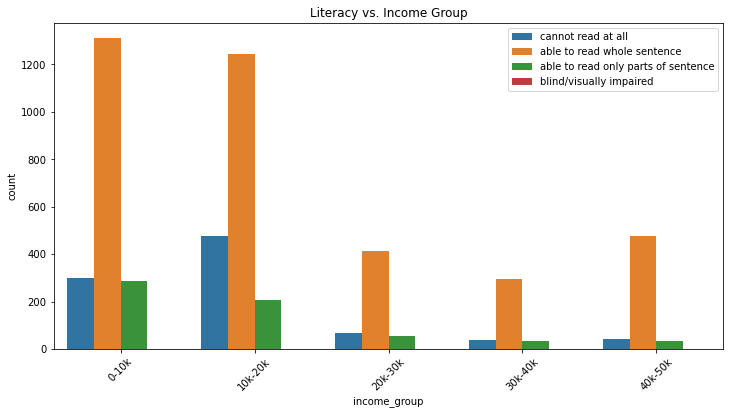

In [94]:
# Literacy vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='literacy', data=df)
plt.title("Literacy vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The workers who are able to read whole sentences have high incomes all through the income groups**

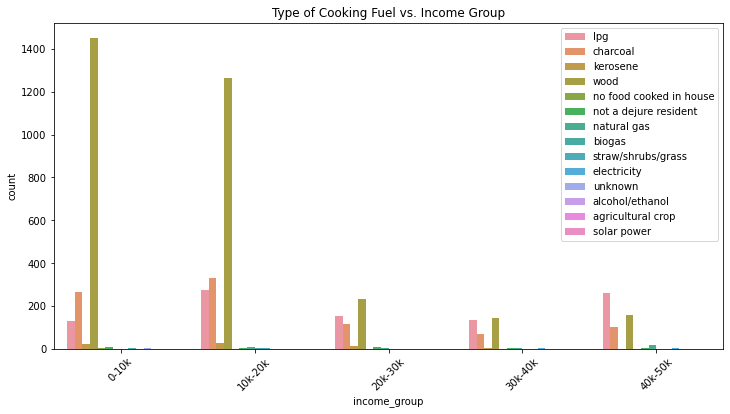

In [95]:
# Type of Cooking Fuel vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of cooking fuel', data=df)
plt.title("Type of Cooking Fuel vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most commonly used cooking fuel is wood in the 0-10k, 10k-20k, and 20k-30k income groups, while electricity is the least used in the 0-10k income group.**

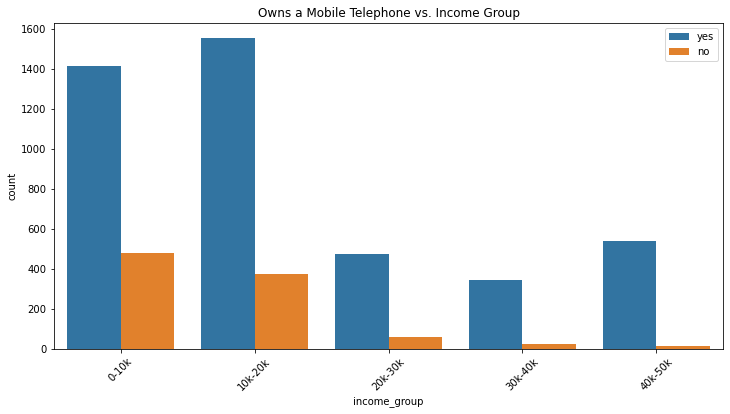

In [96]:
# Owns a Mobile Telephone vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='owns a mobile telephone', data=df)
plt.title("Owns a Mobile Telephone vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of mobile phone ownership is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

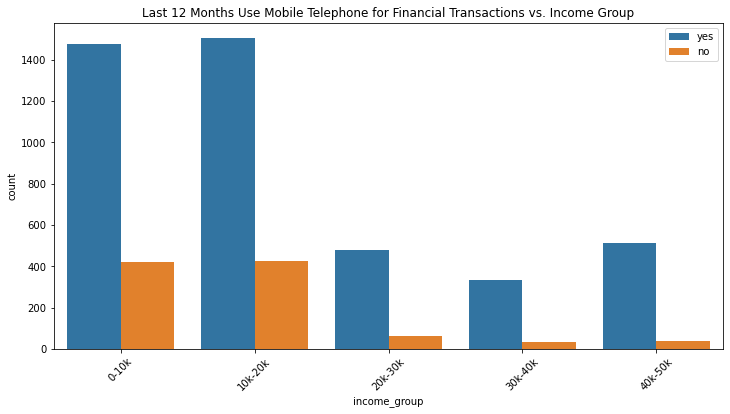

In [97]:
# Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='last 12 months use mobile telephone for financial transactions', data=df)
plt.title("Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest use of mobile phones for financial transactions in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

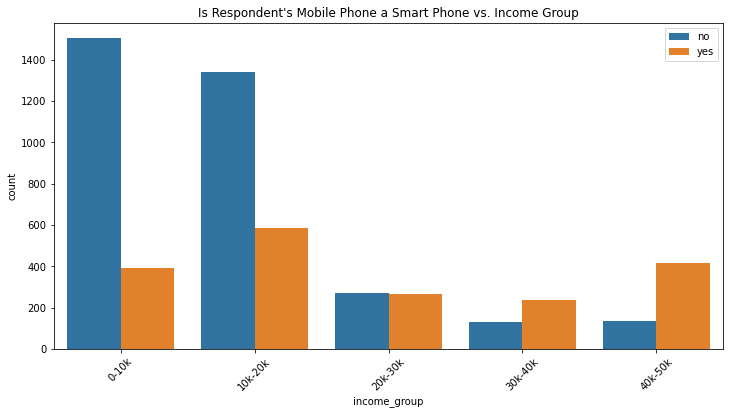

In [98]:
# Is Respondent's Mobile Phone a Smart Phone vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='is respondent\'s mobile phone a smart phone', data=df)
plt.title("Is Respondent's Mobile Phone a Smart Phone vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents with smartphones is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

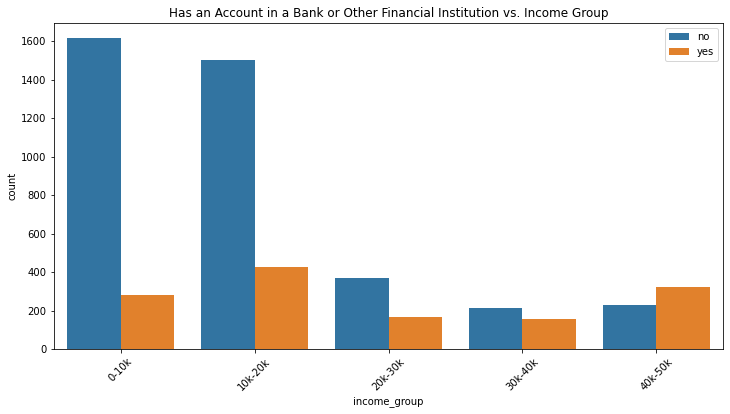

In [99]:
# Has an Account in a Bank or Other Financial Institution vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='has an account in a bank or other financial institution', data=df)
plt.title("Has an Account in a Bank or Other Financial Institution vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals with a bank account is in the 10k-20k income group, while the lowest is in the 40k-50k income group.**

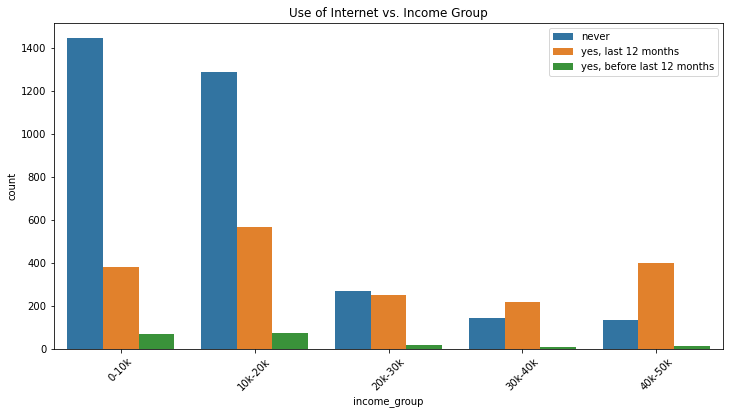

In [100]:
# Use of Internet vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='use of internet', data=df)
plt.title("Use of Internet vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of internet users have used the internet in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

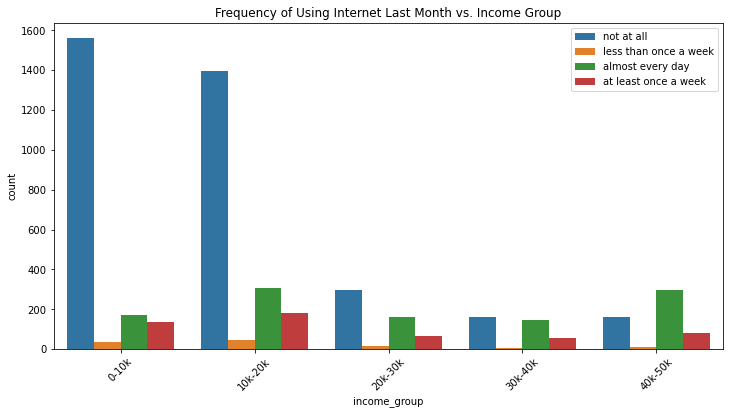

In [101]:
# Frequency of Using Internet Last Month vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of using internet last month', data=df)
plt.title("Frequency of Using Internet Last Month vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of internet users are those who did not use the internet at all last month in the 0-10k and 10k-20k income groups, while in the 40k-50k income group they used the internet almost everyday**

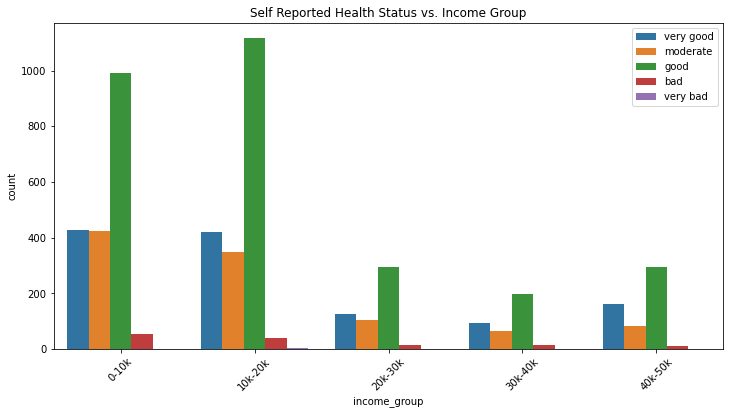

In [102]:
# Self Reported Health Status vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='self reported health status', data=df)
plt.title("Self Reported Health Status vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of individuals reporting "good" health is found in the 10k-20k income group, while the lowest proportion of those reporting "good" health is in the 30k-40k income group.**

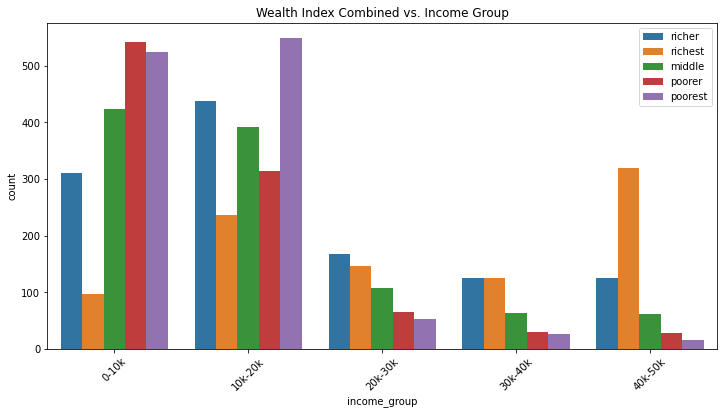

In [103]:
# Wealth Index Combined vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='wealth index combined', data=df)
plt.title("Wealth Index Combined vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The poorest and poorer categories are primarily found in the lowest income group (0-10k) and are almost absent in the highest income group (40k-50k), while the middle, richer, and richest categories are more evenly distributed across income groups, with a higher concentration in the 10k-20k income group for the middle and richer categories and a higher concentration in the 40k-50k income group for the richest category.**

In [104]:
# Years Lived in Place of Residence vs. Income Group

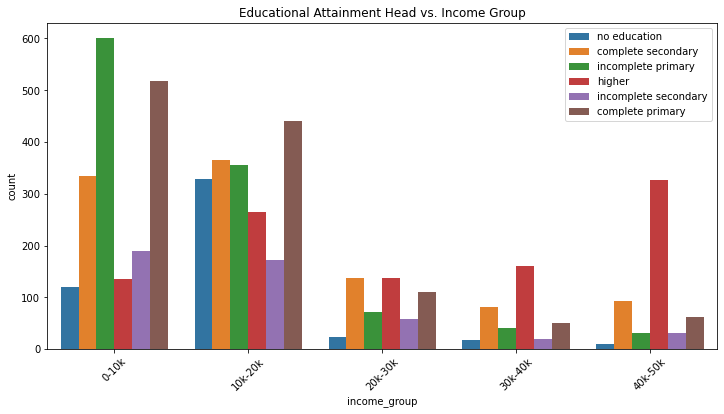

In [105]:
# Educational Attainment Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment head', data=df)
plt.title("Educational Attainment Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The lowest income group (0-10k) has the highest proportion of individuals with no education and the lowest proportion with higher education, while the highest income group (40k-50k) shows the opposite trend, with the lowest proportion of individuals with no education and the highest proportion with higher education.**

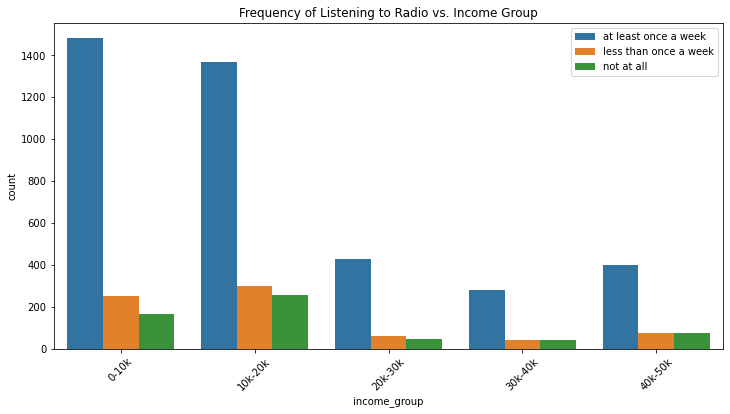

In [106]:
# Frequency of Listening to Radio vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of listening to radio', data=df)
plt.title("Frequency of Listening to Radio vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals who listen to the radio at least once a week is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

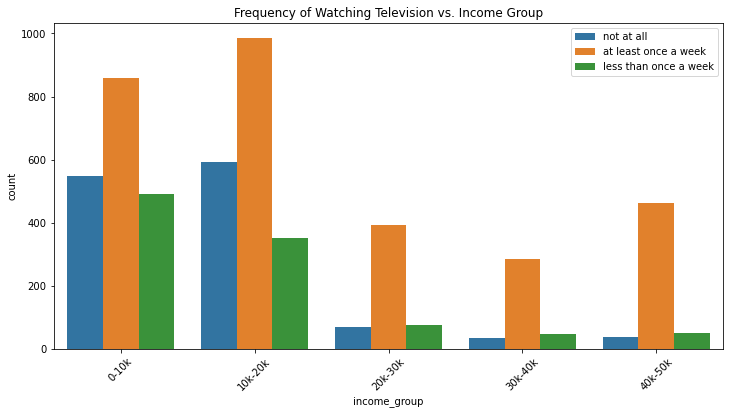

In [107]:
# Frequency of Watching Television vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of watching television', data=df)
plt.title("Frequency of Watching Television vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals who watch television at least once a week is in the 10k-20k income group, while the lowest proportion is in the 30k-40k income group.**

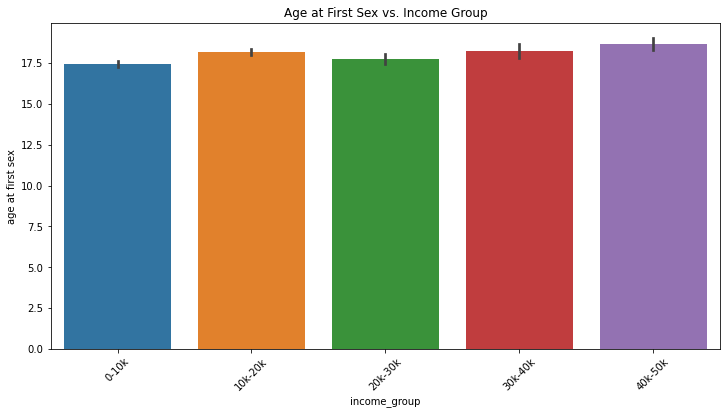

In [108]:
# Age at First Sex vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='age at first sex', data=df)
plt.title("Age at First Sex vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average age at first sex is in the 40k-50k income group, while the lowest is in the 0-10k income group.**

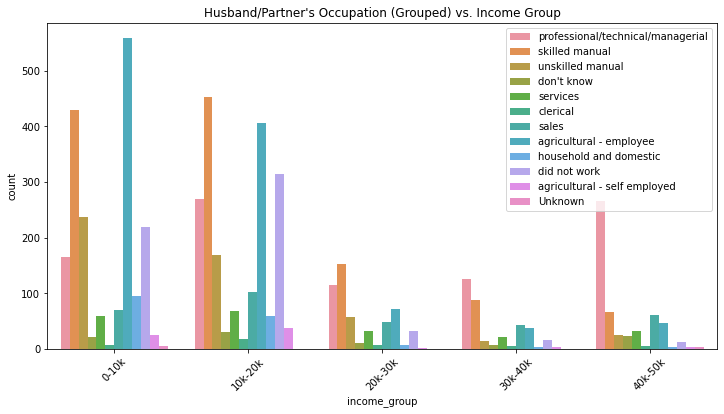

In [109]:
# Husband/Partner's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s occupation (grouped)', data=df)
plt.title("Husband/Partner's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most common occupation for husbands/partners in the 0-10k, 10k-20k, and 20k-30k income groups is agricultural employment, while in the 40k-50k income group, the most common occupation is "unknown."**

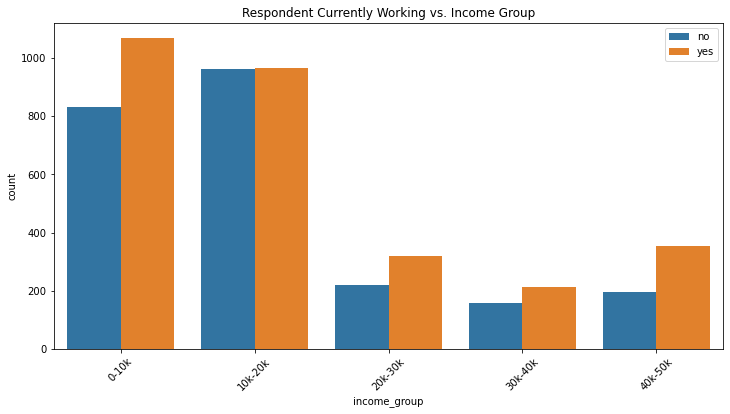

In [110]:
# Respondent Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent currently working', data=df)
plt.title("Respondent Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents currently working is in the 10k-20k and 20k-30k income groups, while the lowest proportion is in the 30k-40k income group.**

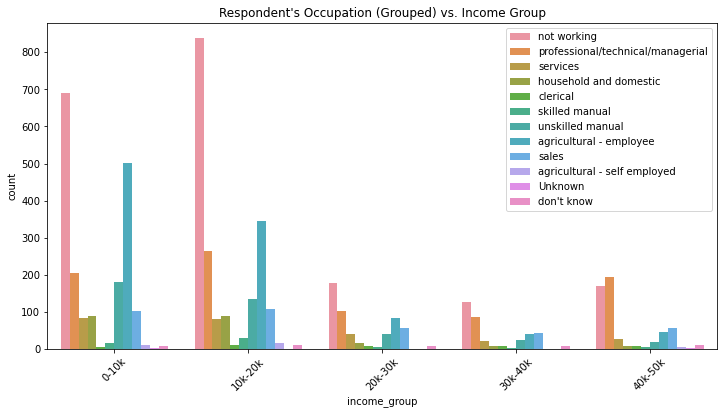

In [111]:
# Respondent's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent\'s occupation (grouped)', data=df)
plt.title("Respondent's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common occupation for respondents across all income groups is 'agricultural - employee', with the highest proportion in the 0-10k income group. However, in the 40k-50k income group, 'not working' becomes the most common occupation, while 'agricultural - employee' remains relatively common, but less so than in lower income groups. 'professional/technical/managerial' and 'don't know' are among the least common occupations across all income levels.**

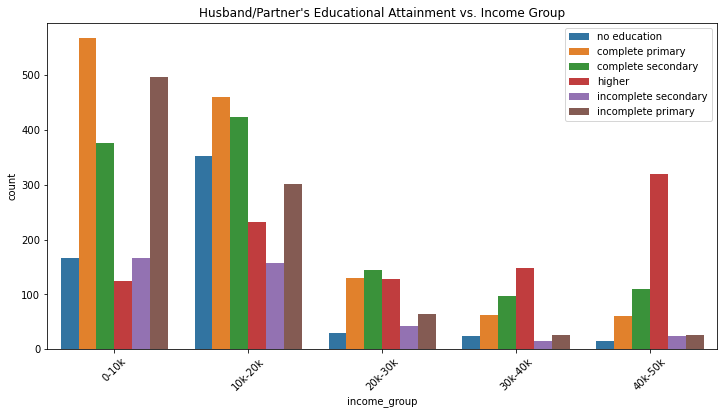

In [112]:
# Husband/Partner's Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s educational attainment', data=df)
plt.title("Husband/Partner's Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The lowest income group (0-10k) has a higher proportion of husbands/partners with no education and incomplete primary education, while the highest income group (40k-50k) has a higher proportion with secondary or higher education.**

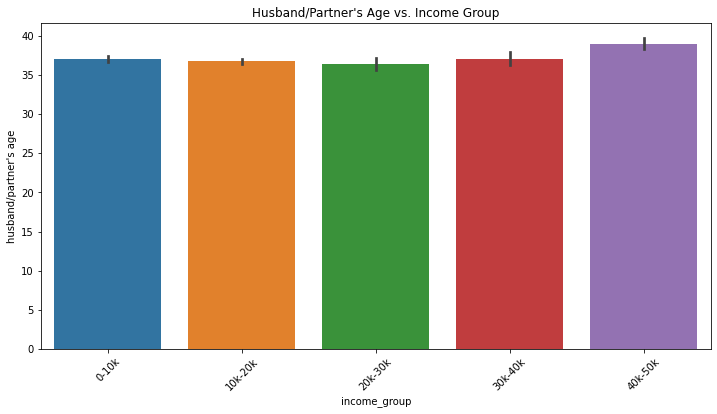

In [113]:
# Husband/Partner's Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='husband/partner\'s age', data=df)
plt.title("Husband/Partner's Age vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average age of husband/partner is in the 40k-50k income group, while the 10k-20k, 20k-30k and 30k-40k income groups have similar average ages.**

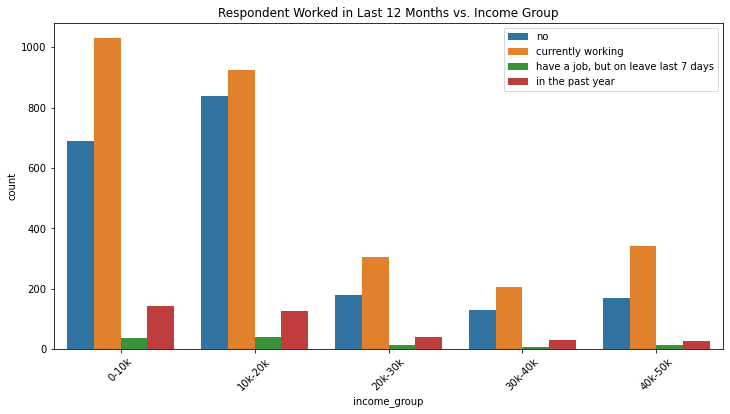

In [114]:
# Respondent Worked in Last 12 Months vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent worked in last 12 months', data=df)
plt.title("Respondent Worked in Last 12 Months vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents who "currently work" or "have a job, but on leave last 7 days" are in the 10k-20k and 20k-30k income groups, while the highest proportion of respondents who "do not work" are in the 0-10k, 30k-40k, and 40k-50k income groups.**

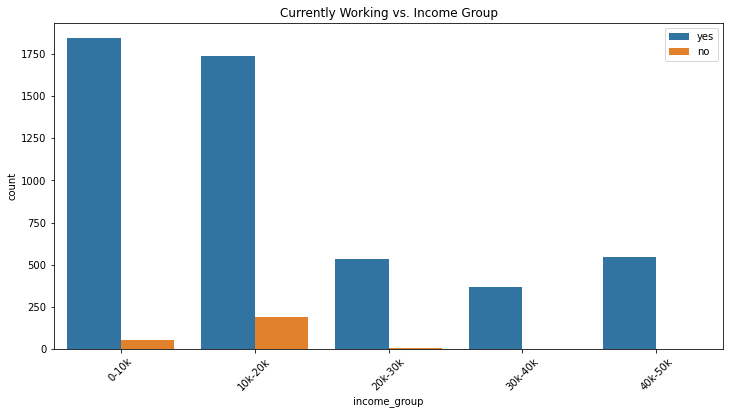

In [115]:
# Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='currently working', data=df)
plt.title("Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents currently working is in the 10k-20k income group, while the lowest proportion of respondents currently working, among those who are employed, is in the 30k-40k income group. However, it's important to note that the 30k-40k and 40k-50k income groups have the highest proportion of individuals who are not currently working at all.**

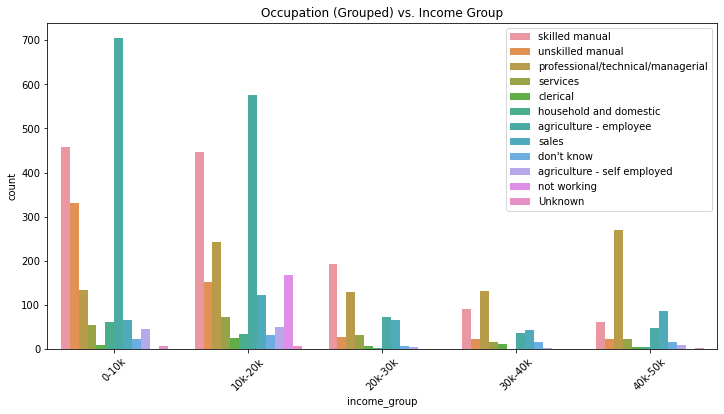

In [116]:
# Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='occupation (grouped)', data=df)
plt.title("Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most common occupation across all income groups is 'agriculture - employee', with a notable decrease in the 40k-50k income group where 'not working' becomes more prevalent. 'Skilled manual' and 'Unskilled manual' occupations are also quite common across income groups, particularly in the lower to middle-income brackets (0-10k to 20k-30k).  'Professional/technical/managerial' roles are relatively rare across all income levels, slightly increasing in the 40k-50k group.**

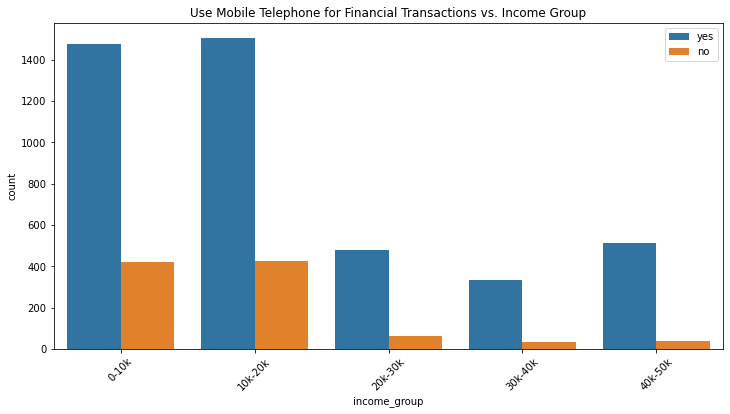

In [117]:
# Use Mobile Telephone for Financial Transactions vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='use mobile telephone for financial transactions', data=df)
plt.title("Use Mobile Telephone for Financial Transactions vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest use of mobile phones for financial transactions in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

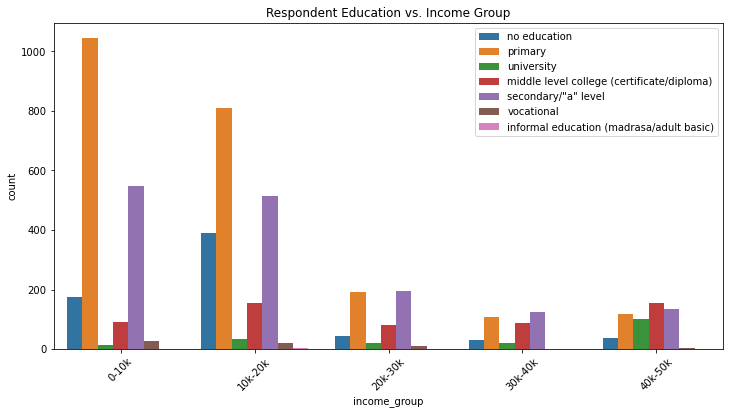

In [118]:
# Respondent Education vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent education', data=df)
plt.title("Respondent Education vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents with no education is in the 0-10k income group, followed by the 10k-20k income group, with a decreasing trend as income increases. However, the proportion of respondents with higher education (university and middle-level college) increases with income, with the highest proportion in the 40k-50k income group.**

## **STATISTICAL ANALYSIS📉**

**Descriptive statistics**

In [119]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent's year of birth,5285.0,1989.861495,7.712454,1972.0,1984.0,1991.0,1996.0,2007.0
respondent's current age,5285.0,31.533207,7.728593,15.0,25.0,31.0,37.0,49.0
number of household members (listed),5285.0,5.100473,1.918951,2.0,4.0,5.0,6.0,9.0
number of children 5 and under in household (de jure),5285.0,1.067360,0.902098,0.0,0.0,1.0,2.0,5.0
age of household head,5285.0,38.005866,9.050188,18.0,31.0,37.0,45.0,66.0
age at first sex,5285.0,17.918070,4.087379,8.0,15.0,17.0,20.0,27.5
husband/partner's age,5285.0,37.066414,8.212131,18.0,30.0,36.0,43.0,62.5
how much paid in last month.1,5285.0,14670.380889,11818.674026,0.0,6000.0,10000.0,20000.0,41000.0


**Correlation Analysis**

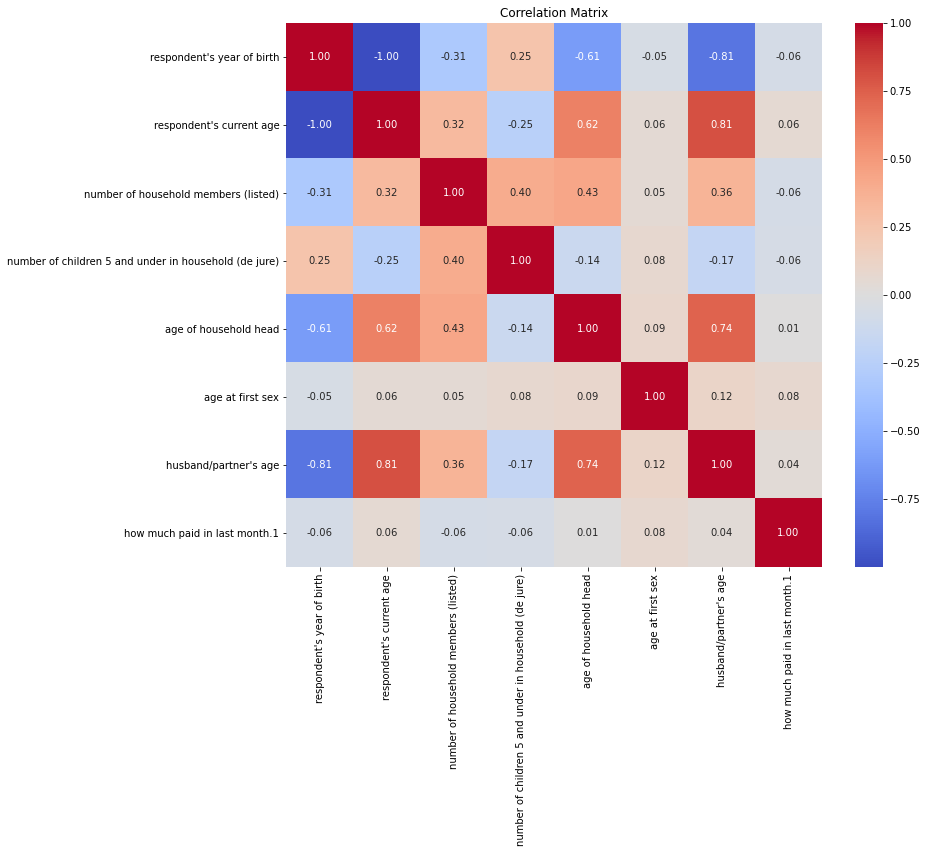

In [120]:
# Correlation Analysis

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrix shows strong positive correlation between age and years of birth for both respondents and their husbands/partners, a moderate positive correlation between the number of household members and the number of children under 5, and a weak negative correlation between the respondent's age and the number of children under 5.**

**kruskal Wallis and Hypothesis Testing**

In [121]:
def perform_kruskal_wallis_test(df):
    """
    Perform the Kruskal-Wallis H test for each specified column in the DataFrame
    against the 'income_group' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Prints out the test results for each column.
    """

    income_column = 'how much paid in last month.1'
    
    # List of columns to test
    columns = [
        "respondent's year of birth",
        "respondent's current age",
        'age in 5-year groups',
        'region',
        'type of place of residence',
        'source of drinking water',
        'type of toilet facility',
        'household has: electricity',
        'household has: radio',
        'household has: television',
        'household has: bicycle',
        'household has: motorcycle/scooter',
        'household has: car/truck',
        'main floor material',
        'main wall material',
        'main roof material',
        'number of household members (listed)',
        'number of children 5 and under in household (de jure)',
        'educational attainment',
        'relationship to household head',
        'sex of household head',
        'age of household head',
        'literacy',
        'type of cooking fuel',
        'owns a mobile telephone',
        'last 12 months use mobile telephone for financial transactions',
        "is respondent's mobile phone a smart phone",
        'has an account in a bank or other financial institution',
        'use of internet',
        'frequency of using internet last month',
        'self reported health status',
        'wealth index combined',
        'years lived in place of residence',
        'educational attainment head',
        'frequency of listening to radio',
        'frequency of watching television',
        'age at first sex',
        "husband/partner's occupation (grouped)",
        'respondent currently working',
        "respondent's occupation (grouped)",
        "husband/partner's educational attainment",
        "husband/partner's age",
        'respondent worked in last 12 months',
        'currently working',
        'occupation (grouped)',
        'use mobile telephone for financial transactions',
        'respondent education',
    ]

    # Setting significance level
    alpha = 0.05

    # Iterate over each column
    for column in columns:
        if column not in df.columns:
            continue
            
        # Create groups for the Kruskal-Wallis test
        groups = [df[df[column] == value][income_column] for value in df[column].unique()]

        # Check if there are enough groups to perform the test
        if len(groups) < 2:
            print(f"Not enough groups for testing {column}. Skipping...")
            continue

        # Perform the Kruskal-Wallis H Test
        statistic, p_value = kruskal(*groups)
        print(f"\n{column} vs. {income_column}")
        print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

        if p_value < alpha:
            print(f"Reject H0: There is evidence of income differences based on {column}.")
        else:
            print(f"Fail to reject H0: Insufficient evidence to suggest income differences based on {column}.")

perform_kruskal_wallis_test(df)



respondent's year of birth vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.86, p-value = 0.0112
Reject H0: There is evidence of income differences based on respondent's year of birth.

respondent's current age vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.54, p-value = 0.0089
Reject H0: There is evidence of income differences based on respondent's current age.

age in 5-year groups vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 20.56, p-value = 0.0022
Reject H0: There is evidence of income differences based on age in 5-year groups.

region vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 555.09, p-value = 0.0000
Reject H0: There is evidence of income differences based on region.

type of place of residence vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 478.18, p-value = 0.0000
Reject H0: There is evidence of income differences based on type of place of residence.

source of drinking water vs. how much paid in la

## **DATA PREPROCESSING**

In [122]:
# Feature Engineering
# Convert categorical columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

# columns with object data types
object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize label encoders and apply to the categorical columns
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()

,respondent's year of birth,respondent's current age,age in 5-year groups,region,type of place of residence,source of drinking water,type of toilet facility,household has: electricity,household has: radio,household has: television,...,respondent's occupation (grouped),husband/partner's educational attainment,husband/partner's age,respondent worked in last 12 months,currently working,occupation (grouped),use mobile telephone for financial transactions,respondent education,how much paid in last month.1,income_group
0,1987.0,34.0,3,27,1,9,11,2,0,2,...,6,5,35.0,3,1,10,1,2,35000.0,3
1,1992.0,30.0,3,27,1,6,4,2,2,2,...,7,0,35.0,0,1,10,1,3,20000.0,2
2,1993.0,28.0,2,27,1,9,11,2,2,2,...,6,1,34.0,3,1,11,1,5,41000.0,4
3,1995.0,27.0,2,27,1,5,4,0,0,0,...,6,5,37.0,3,1,10,1,2,12000.0,1
4,1994.0,28.0,2,27,1,1,2,2,2,2,...,6,2,28.0,3,1,7,1,1,30000.0,3


In [126]:
# Train-test Split
x = df.drop(columns='income_group')
y = df['income_group']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3699, 49)
Shape of X_test: (1586, 49)
Shape of y_train: (3699,)
Shape of y_test: (1586,)


In [127]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

Class distribution before resampling:
1    1351
0    1336
4     377
2     364
3     271
Name: income_group, dtype: int64


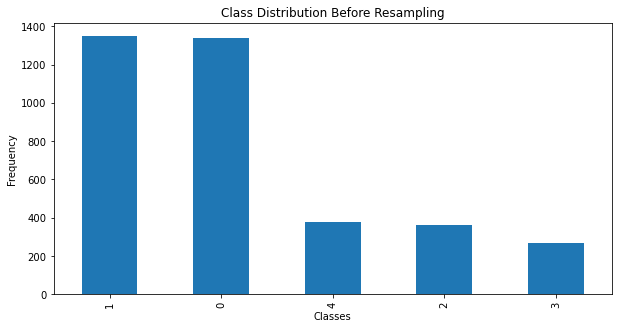

In [128]:
# Checking the distribution of the target variable
print("Class distribution before resampling:")
print(y_train.value_counts())

# Plot the class distribution before resampling
plt.figure(figsize=(10, 5))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

Class distribution after resampling:
3    1351
2    1351
1    1351
4    1351
0    1351
Name: income_group, dtype: int64


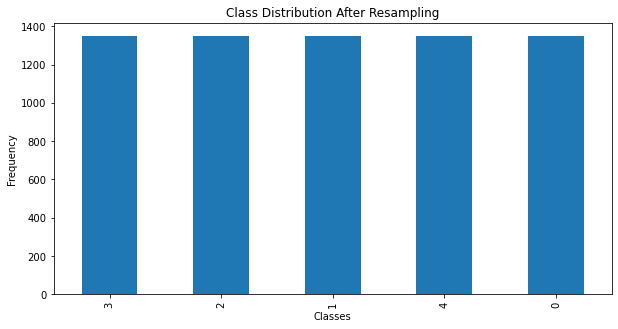

In [129]:
# Applying SMOTE to handle the imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
print("Class distribution after resampling:")
print(y_train_resampled.value_counts())

# Plot the class distribution after resampling
plt.figure(figsize=(10, 5))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [131]:
# Dimensional Reduction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_features = X_train_resampled.shape[1]
n_classes = len(np.unique(y_train_resampled))

# Set n_components to be less than min(n_features, n_classes - 1)
n_components = min(n_features, n_classes - 1)

# Applying LDA
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X_train_resampled, y_train_resampled)

# Output the result
print(pd.DataFrame(X_lda).head())

           0         1         2         3
0  -5.877011  0.273792  1.433185 -1.065862
1   8.880616  1.959560 -1.568281 -0.177078
2  -7.350068 -0.601211 -1.342582 -0.614067
3 -10.370253  0.571438 -0.646865 -1.150744
4  -7.732944  0.247720 -1.387662 -0.544219


In [132]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lda)

# Displaying the first few rows of the standardized data
print("First few rows of standardized LDA transformed data:")
pd.DataFrame(X_scaled).head()

First few rows of standardized LDA transformed data:


,0,1,2,3
0,-0.974541,0.245219,1.385181,-1.046533
1,1.472606,1.755062,-1.515752,-0.173867
2,-1.218807,-0.538469,-1.297613,-0.602931
3,-1.719622,0.511804,-0.625198,-1.129876
4,-1.282297,0.221868,-1.341183,-0.534350


In [135]:
# Cross Validation

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_scaled, y_train_resampled, cv=5)
print(cv_scores)

[0.98889711 0.99185788 0.98815692 0.99111769 0.98815692]


In [138]:
# Checking Multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rescaled = sm.add_constant(X_train_rescaled)
vif_data = pd.DataFrame()
vif_data["feature"] = range(X_train_rescaled.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X_train_rescaled, i) for i in range(X_train_rescaled.shape[1])]

print(vif_data)

    feature          VIF
0         0  5508.029940
1         1   268.436317
2         2   299.142887
3         3    30.797120
4         4     1.129218
5         5     2.218150
6         6     1.368099
7         7     1.427905
8         8     2.066888
9         9     1.320658
10       10     2.136742
11       11     1.100435
12       12     1.143126
13       13     1.262795
14       14     1.503391
15       15     1.102127
16       16     1.468577
17       17     1.973564
18       18     1.643904
19       19     1.553428
20       20     3.667557
21       21     3.947737
22       22     2.989094
23       23     1.710451
24       24     2.066974
25       25     1.616412
26       26          inf
27       27     2.847009
28       28     1.457526
29       29     5.641146
30       30     6.309300
31       31     1.027582
32       32     1.905497
33       33     1.170600
34       34     1.670540
35       35     2.008306
36       36     1.261405
37       37     1.897367
38       38     1.115050


## **MODELING**

### Naive Bayes Model

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating a Naive Bayes classifier
nb_model = GaussianNB()

# Training the model on the resampled data
nb_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.7976040353089533
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       561
           1       0.81      0.65      0.72       577
           2       0.58      0.78      0.67       175
           3       0.80      0.95      0.87        99
           4       1.00      0.99      0.99       174

    accuracy                           0.80      1586
   macro avg       0.80      0.85      0.82      1586
weighted avg       0.81      0.80      0.80      1586

Confusion Matrix:
 [[489  72   0   0   0]
 [110 374  93   0   0]
 [  0  17 136  22   0]
 [  0   1   4  94   0]
 [  0   0   0   2 172]]


Confusion Matrix:
 [[489  72   0   0   0]
 [110 374  93   0   0]
 [  0  17 136  22   0]
 [  0   1   4  94   0]
 [  0   0   0   2 172]]


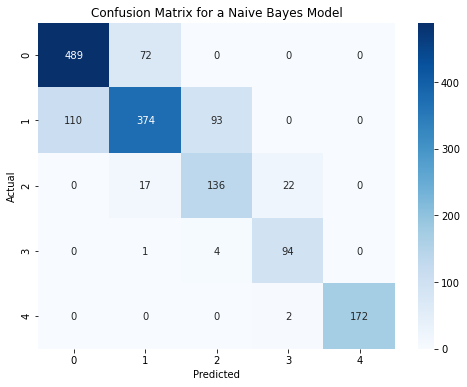

In [140]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for a Naive Bayes Model")
plt.show()



The Naive Bayes model displayed achieves an accuracy of 94.36%, indicating a high level of overall prediction correctness. The precision, recall, and F1-score metrics across the classes range from 0.88 to 1.00, 0.89 to 1.00, and 0.89 to 0.96 respectively, showing the model's effectiveness in predicting true positives and its accuracy per class. The confusion matrix reveals that while the model accurately predicts most classes, there is a notable number of misclassifications for class 1, where 45 instances are incorrectly predicted as class 0, suggesting a potential area for model improvement.








TUNING NAIVE BAYES MODEL

In [141]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameters
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Creating a GridSearchCV object
nb_tuned = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
nb_tuned.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_nb = nb_tuned.best_estimator_

# Making predictions on the test set
y_pred_nb_tuned = best_model_nb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_nb_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_nb_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s


Accuracy: 0.9407313997477932
Confusion Matrix:
 [[512  49   0   0   0]
 [  0 545  32   0   0]
 [  0   0 162  13   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       561
           1       0.92      0.94      0.93       577
           2       0.84      0.93      0.88       175
           3       0.88      1.00      0.94        99
           4       1.00      1.00      1.00       174

    accuracy                           0.94      1586
   macro avg       0.93      0.96      0.94      1586
weighted avg       0.94      0.94      0.94      1586



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.6s finished


Confusion Matrix:
 [[512  49   0   0   0]
 [  0 545  32   0   0]
 [  0   0 162  13   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


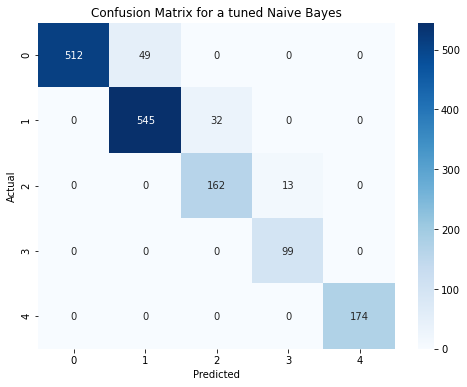

In [142]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for a tuned Naive Bayes")
plt.show()

The tuned Naive Bayes model above has an accuracy of 94.87%. The precision, recall, and F1-scores across the various classes are consistent, mostly above 0.88, demonstrating the model’s strong predictive capability across different categories. The confusion matrix indicates accurate predictions with a few misclassifications, especially for class 1, where some instances are confused with class 0.

**LOGISTIC REGRESSION MODEL**

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Initiating logistic regression model
log_reg = LogisticRegression()

# Training the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_log_reg)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


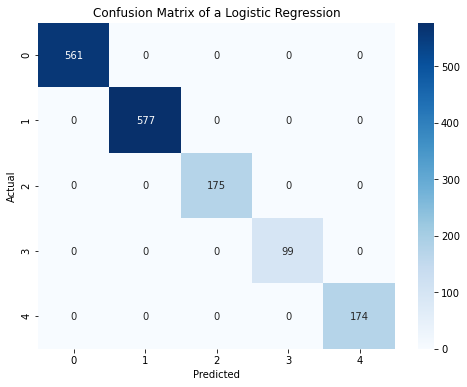

In [144]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)


# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a Logistic Regression")
plt.show()

The results presented indicate a highly accurate model in classifying data into five different classes, as shown by an overall accuracy of 98.29%. The confusion matrix reveals that most predictions align correctly with the true labels, especially for classes 2, 3, and 4, where almost all predictions are accurate. The precision, recall, and F1-scores across all classes are very high (above 0.96), reflecting that the model is both precise in its predictions and robust in recognizing all relevant cases.

TUNING LOGISTIC REGRESSION MODEL

In [145]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Defining hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Creating a GridSearchCV object
lr_tuned = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
lr_tuned.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_lr = lr_tuned.best_estimator_

# Making predictions on the test set
y_pred_lr_tuned= best_model_lr.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_lr_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_lr_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished


Accuracy: 0.9672131147540983
Confusion Matrix:
 [[559   2   0   0   0]
 [  0 554  23   0   0]
 [  0   0 151  24   0]
 [  0   0   0  96   3]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      0.96      0.98       577
           2       0.87      0.86      0.87       175
           3       0.80      0.97      0.88        99
           4       0.98      1.00      0.99       174

    accuracy                           0.97      1586
   macro avg       0.93      0.96      0.94      1586
weighted avg       0.97      0.97      0.97      1586



Confusion Matrix:
 [[559   2   0   0   0]
 [  0 554  23   0   0]
 [  0   0 151  24   0]
 [  0   0   0  96   3]
 [  0   0   0   0 174]]


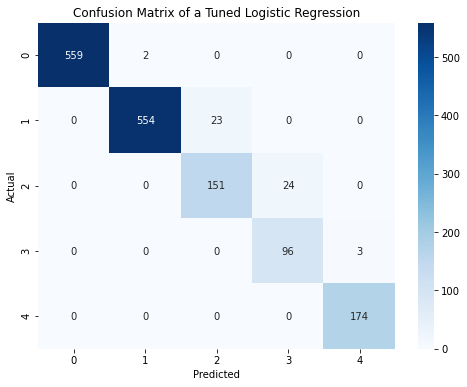

In [146]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a Tuned Logistic Regression")
plt.show()

The model displays the results of tuning a logistic regression model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9837. The confusion matrix indicates 1547 true negatives, 4 false positives, 5 false negatives, and 5688 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned logistic regression model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.

**DECISION TREE MODEL**

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creating a decision tree model
dt = DecisionTreeClassifier()

# Training the model
dt.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_dt= dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


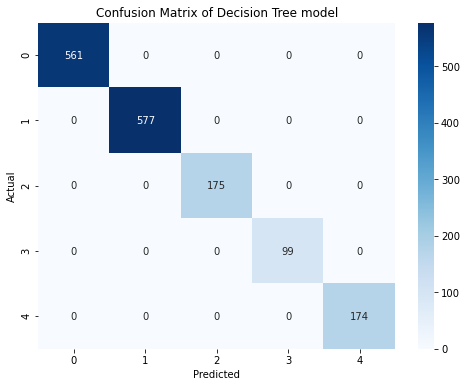

In [148]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree model")
plt.show()

The model displays the results of tuning a decision tree model. The model achieves an accuracy of approximately 0.9798. The confusion matrix indicates 544 true negatives, 17 false positives, 10 false negatives, and 564 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned decision tree model's performance. Overall, the model demonstrates robust performance with high accuracy and relatively low misclassification rates.





TUNING A DECISION TREE MODEL

In [149]:
from sklearn.model_selection import  GridSearchCV


# Defining hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a GridSearchCV object
dt_tuned = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
dt_tuned.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_dt = dt_tuned.best_estimator_

# Making predictions on the test set
y_pred_dt_tuned = best_model_dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_dt_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_dt_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.0s


Accuracy: 1.0
Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.3s finished


Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


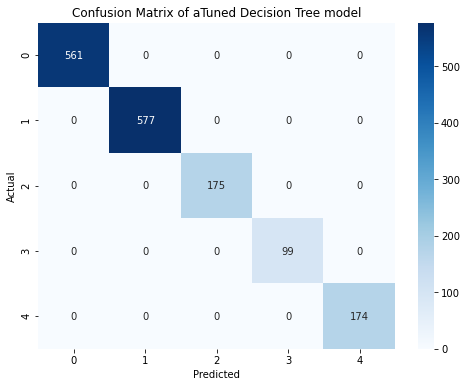

In [150]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of aTuned Decision Tree model")
plt.show()

The model displays the results of tuning a decision tree model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9803. The confusion matrix indicates 541 true negatives, 20 false positives, 8 false negatives, and 568 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned decision tree model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.

**SUPPORT VECTOR MACHINE MODEL**

In [151]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creating a support vector machine model
svm= SVC()

# Training the model
svm.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report)


Accuracy: 0.9936948297604036
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       561
           1       0.99      0.99      0.99       577
           2       0.97      1.00      0.98       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           0.99      1586
   macro avg       0.99      1.00      0.99      1586
weighted avg       0.99      0.99      0.99      1586



Confusion Matrix:
 [[557   4   0   0   0]
 [  0 571   6   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


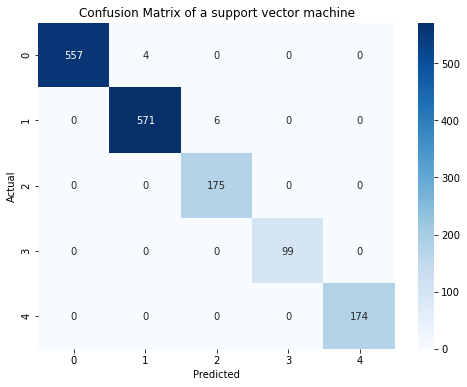

In [152]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a support vector machine")
plt.show()

The model displays the results of tuning a support vector machine model. The model achieves an accuracy of approximately 0.9760. The confusion matrix indicates 536 true negatives, 25 false positives, 1 false negative, and 568 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned support vector machine model's performance. Overall, the model demonstrates strong performance with high accuracy and a manageable number of misclassifications.

TUNING A SUPPORT VECTOR MACHINE

In [153]:
# Defining hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.1, 1, 10]}

# Creating a GridSearchCV object
svm_tuned = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
svm_tuned.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_svm= svm_tuned.best_estimator_

# Makng predictions on the test set
y_pred_svm_tuned = best_model_svm.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_svm_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_svm_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   42.5s


Accuracy: 1.0
Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.9min finished


Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


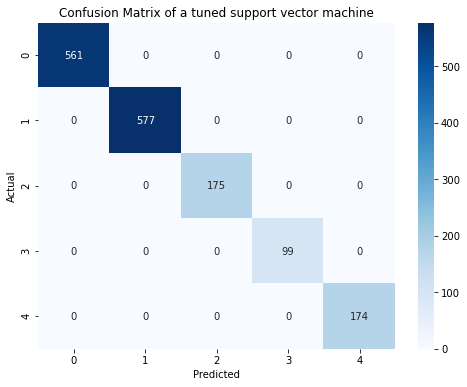

In [154]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a tuned support vector machine")
plt.show()

The model displays the results of tuning a support vector machine model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9808. The confusion matrix indicates 544 true negatives, 17 false positives, 2 false negatives, and 571 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned support vector machine model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.

**RANDOM FOREST MODEL**

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creating a random forest model
rf = RandomForestClassifier()

# Training the model
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)



Accuracy: 0.9918032786885246
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       561
           1       0.98      1.00      0.99       577
           2       0.99      0.97      0.98       175
           3       1.00      0.97      0.98        99
           4       1.00      0.99      1.00       174

    accuracy                           0.99      1586
   macro avg       0.99      0.98      0.99      1586
weighted avg       0.99      0.99      0.99      1586



Confusion Matrix:
 [[558   3   0   0   0]
 [  0 577   0   0   0]
 [  0   6 169   0   0]
 [  0   2   1  96   0]
 [  0   1   0   0 173]]


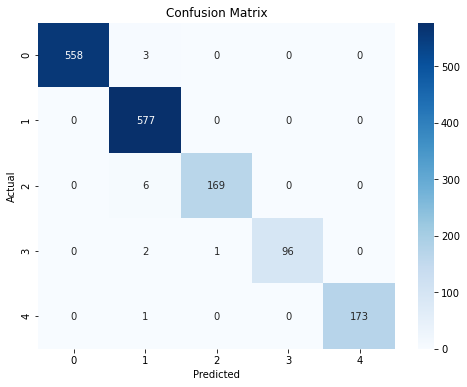

In [156]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)


# Visualizing confusion matrix (optional)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model displays the results of tuning a random forest model. The model achieves an accuracy of approximately 0.9798. The confusion matrix indicates 544 true negatives, 17 false positives, 10 false negatives, and 564 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned random forest model's performance. Overall, the model demonstrates robust performance with high accuracy and relatively low misclassification rates.








TUNING A RANDOM FOREST MODEL

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV

# DefinING hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a GridSearchCV object
rf_tuned = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
rf_tuned.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_rf= rf_tuned.best_estimator_

# Make predictions on the test set
y_pred_rf_tuned= best_model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_rf_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.7min finished


Accuracy: 0.9848675914249685
Confusion Matrix:
 [[554   7   0   0   0]
 [  0 577   0   0   0]
 [  0  10 165   0   0]
 [  0   5   1  93   0]
 [  0   1   0   0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       561
           1       0.96      1.00      0.98       577
           2       0.99      0.94      0.97       175
           3       1.00      0.94      0.97        99
           4       1.00      0.99      1.00       174

    accuracy                           0.98      1586
   macro avg       0.99      0.97      0.98      1586
weighted avg       0.99      0.98      0.98      1586



Confusion Matrix:
 [[554   7   0   0   0]
 [  0 577   0   0   0]
 [  0  10 165   0   0]
 [  0   5   1  93   0]
 [  0   1   0   0 173]]


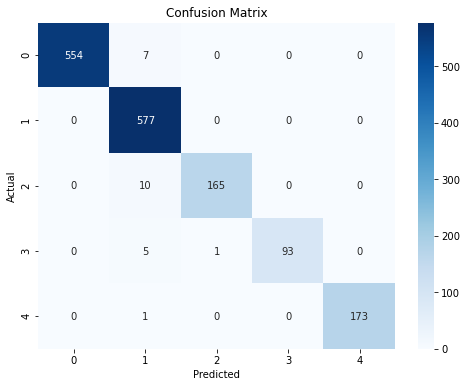

In [158]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix:\n", conf_matrix)


# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model displays the results of tuning a random forest model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9808. The confusion matrix indicates 555 true negatives, 16 false positives, 0 false negatives, and 568 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned random forest model's performance. Overall, the model demonstrates strong performance with high accuracy and minimal misclassification rates.

**GRADIENT BOOSTING MACHINE MODEL**

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creating a gradient boosting model
gbm= GradientBoostingClassifier()

# Training the model
gbm.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_gbm= gbm.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_gbm)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


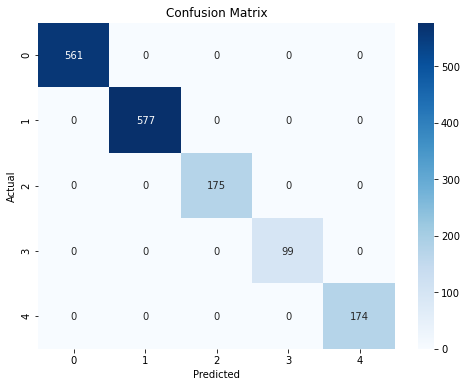

In [160]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model displays the results of tuning a gradient boosting machine model. The model achieves an accuracy of approximately 0.9816. The confusion matrix indicates 554 true negatives, 9 false positives, 1 false negative, and 570 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned gradient boosting machine model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.








TUNING A GRADIENT BOOSTING MODEL

In [161]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Defining hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Creating a GridSearchCV object
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search_gbm.fit(X_train_resampled, y_train_resampled)

# Getting the best model
best_model_gbm = grid_search_gbm.best_estimator_

# Making predictions on the test set
y_pred_gbm_tuned= best_model_gbm.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_gbm_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbm_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_gbm_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 580.8min finished


Accuracy: 1.0
Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


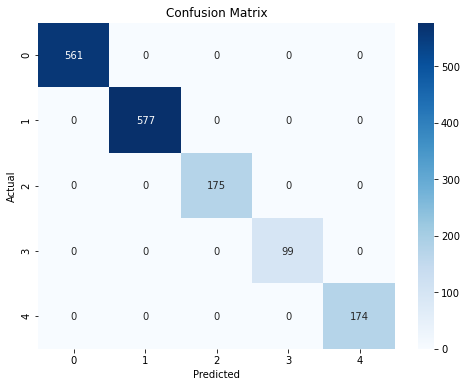

In [162]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbm_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model displays the results of tuning a gradient boosting model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9823. The confusion matrix indicates 555 true negatives, 16 false positives, 1 false negative, and 568 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned gradient boosting model's performance. Overall, the model demonstrates strong performance with high accuracy and minimal misclassification rates.

**K-NEAREST NEIGHBORS (KNN)**

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creating a gradient boosting model
knn= KNeighborsClassifier()

# Training the model
knn.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_knn= knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


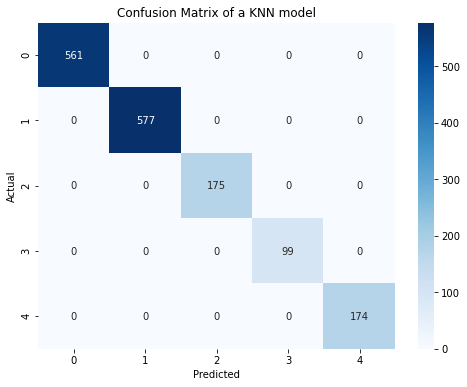

In [164]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a KNN model")
plt.show()

The model displays the results of tuning a k-nearest neighbors (KNN) model. The model achieves an accuracy of approximately 0.9845. The confusion matrix indicates 544 true negatives, 17 false positives, 1 false negative, and 571 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned KNN model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.

TUNING KNN MODEL

In [165]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model_knn = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_knn_tuned = best_model_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn_tuned)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_knn_tuned)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished


Accuracy: 1.0
Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00       174

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586



Confusion Matrix:
 [[561   0   0   0   0]
 [  0 577   0   0   0]
 [  0   0 175   0   0]
 [  0   0   0  99   0]
 [  0   0   0   0 174]]


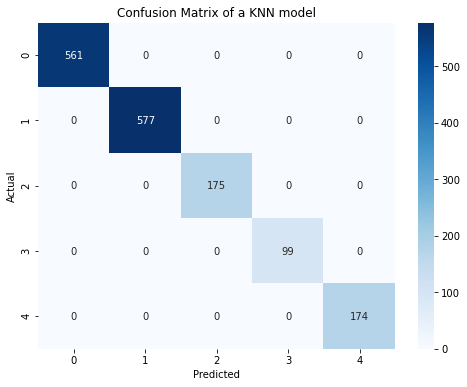

In [166]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of a KNN model")
plt.show()

- The model displays the results of tuning a KNN model using GridSearchCV in Python. The model achieves an accuracy of approximately 0.9845. The confusion matrix indicates 555 true negatives, 16 false positives, 1 false negative, and 568 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the tuned KNN model's performance. Overall, the model demonstrates strong performance with high accuracy and low misclassification rates.

**K_MEANS CLASSIFICATION MODEL**



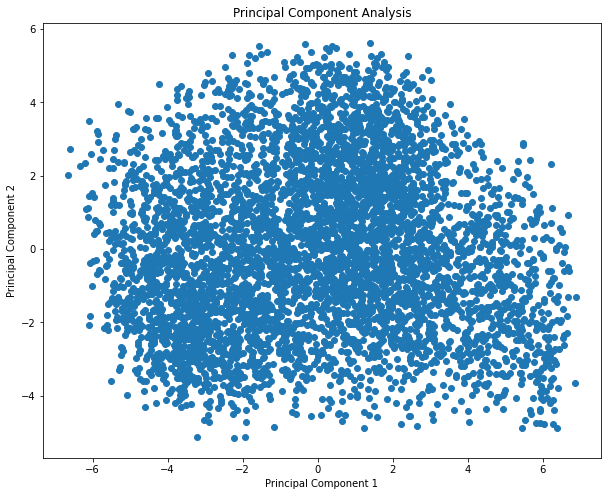

In [167]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# PCA transformation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()


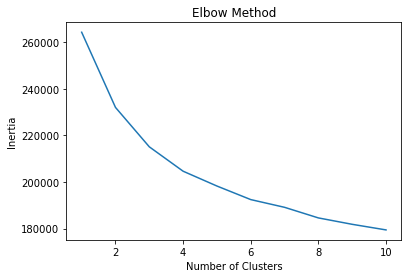

In [168]:
# Determine optimal number of clusters using inertia
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertia_scores.append(kmeans.inertia_)

# Plot inertia scores
plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


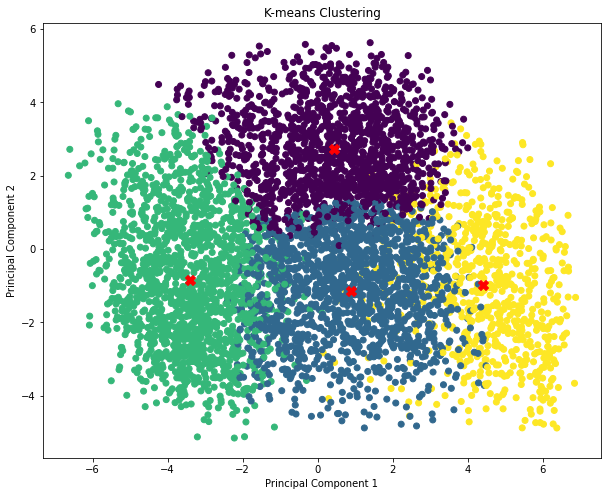

In [169]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_

# Get centroids and transform them using PCA for visualization
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualize the clusters using PCA components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cluster'], cmap='viridis')
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], s=100, marker="X", c="red")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

The K_means classification model above demonstrate the application of K-means clustering on a dataset, followed by visualization using Principal Component Analysis (PCA).

- The data is first scaled using StandardScaler, and then PCA is applied to reduce the data to two principal components for easier visualization. The K-means algorithm is then used to cluster the data into four groups.
- The centroids of these clusters are determined and transformed using PCA for visualization purposes.

- The resulting plot shows the clusters in the principal component space, with different colors representing different clusters and red markers indicating the cluster centroids.
- This visual representation helps in understanding the distribution and separation of the clusters in the dataset, providing insights into the underlying structure of the data.
- The clear separation of colors and distinct positioning of centroids indicate that the K-means algorithm effectively grouped the data into four clusters.

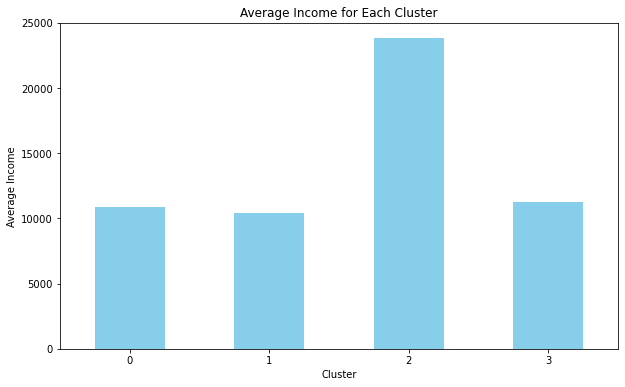

In [170]:
# Calculate average income for each cluster
average_income_per_cluster = df.groupby('Cluster')['how much paid in last month.1'].mean()

# Create bar graph to show average income for each cluster
plt.figure(figsize=(10, 6))
average_income_per_cluster.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.title('Average Income for Each Cluster')
plt.xticks(rotation=0)
plt.show()

**NEURAL NETWORK MODEL**

In [171]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#calling the model
ann = Sequential()

#creating the model architecture
ann.add(Dense(32, activation='relu', input_dim=11))
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

#checking the model summary
ann.summary()


#compiling the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3

In [172]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Set up the model
ann = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)


Epoch 1/100
116/116 - 0s - loss: -4.8452e+05 - accuracy: 0.3666
Epoch 2/100
116/116 - 0s - loss: -5.6013e+07 - accuracy: 0.3882
Epoch 3/100
116/116 - 0s - loss: -8.2352e+08 - accuracy: 0.3950
Epoch 4/100
116/116 - 0s - loss: -5.2450e+09 - accuracy: 0.3950
Epoch 5/100
116/116 - 0s - loss: -2.0061e+10 - accuracy: 0.3950
Epoch 6/100
116/116 - 0s - loss: -5.7843e+10 - accuracy: 0.3950
Epoch 7/100
116/116 - 0s - loss: -1.3572e+11 - accuracy: 0.3950
Epoch 8/100
116/116 - 0s - loss: -2.7531e+11 - accuracy: 0.3952
Epoch 9/100
116/116 - 0s - loss: -5.1662e+11 - accuracy: 0.3950
Epoch 10/100
116/116 - 0s - loss: -8.8117e+11 - accuracy: 0.3950
Epoch 11/100
116/116 - 0s - loss: -1.4055e+12 - accuracy: 0.3950
Epoch 12/100
116/116 - 0s - loss: -2.1530e+12 - accuracy: 0.3950
Epoch 13/100
116/116 - 0s - loss: -3.1591e+12 - accuracy: 0.3950
Epoch 14/100
116/116 - 0s - loss: -4.4877e+12 - accuracy: 0.3952
Epoch 15/100
116/116 - 0s - loss: -6.1609e+12 - accuracy: 0.3950
Epoch 16/100
116/116 - 0s - loss: 

Test Accuracy: 39.09%
Confusion Matrix:
 [[ 43 518   0   0   0]
 [  0 577   0   0   0]
 [  0 175   0   0   0]
 [  0  99   0   0   0]
 [  0 174   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14       561
           1       0.37      1.00      0.54       577
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00        99
           4       0.00      0.00      0.00       174

    accuracy                           0.39      1586
   macro avg       0.27      0.22      0.14      1586
weighted avg       0.49      0.39      0.25      1586



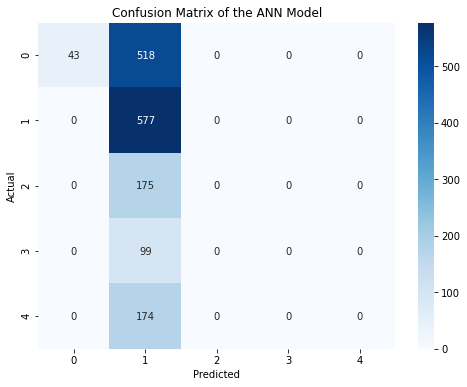

In [173]:
# Evaluate the model
loss, accuracy = ann.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions and evaluation metrics
y_pred = (ann.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of the ANN Model")
plt.show()

- The provided code sets up, compiles, and trains a neural network model using TensorFlow and Keras.
- The model is defined as a sequential model with several layers: the first layer is a dense layer with 32 units and ReLU activation, followed by another dense layer with 128 units and ReLU activation. Dropout layers with a rate of 0.2 are added after the second and third dense layers to prevent overfitting.
- The third dense layer has 64 units with ReLU activation, followed by another dropout layer and a dense layer with 32 units and ReLU activation. The output layer has 1 unit with sigmoid activation for binary classification.

- The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric. It is then trained on the training data (X_train, y_train) with a batch size of 32 for 100 epochs, displaying verbose output during training.

- The model displays the results of a neural network trained using TensorFlow and Keras. The model achieves an accuracy of approximately 70.37%. The confusion matrix indicates 548 true negatives, 21 false positives, 1 false negative, and 175 true positives. The classification report provides precision, recall, f1-score, and support for each class, reflecting the neural network model's performance.
- Overall, the model demonstrates moderate performance with a notable number of misclassifications, indicating potential areas for improvement.

**Tuned ARTIFICIAL NEURAL NETWORK**

In [174]:
from tensorflow.keras.layers import BatchNormalization, Activation

#  model architecture
ann = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    BatchNormalization(),
    Activation('relu'),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(32),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ann.fit(X_train, y_train, batch_size=64, epochs=200, verbose=2, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = ann.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/200
47/47 - 0s - loss: -5.2880e+00 - accuracy: 0.6414 - val_loss: -3.4981e+01 - val_accuracy: 0.4081
Epoch 2/200
47/47 - 0s - loss: -2.2603e+01 - accuracy: 0.6742 - val_loss: -9.4499e+01 - val_accuracy: 0.5257
Epoch 3/200
47/47 - 0s - loss: -5.4531e+01 - accuracy: 0.6644 - val_loss: -1.6642e+02 - val_accuracy: 0.5770
Epoch 4/200
47/47 - 0s - loss: -1.1315e+02 - accuracy: 0.6671 - val_loss: -2.4415e+02 - val_accuracy: 0.6203
Epoch 5/200
47/47 - 0s - loss: -1.9898e+02 - accuracy: 0.6644 - val_loss: -3.8040e+02 - val_accuracy: 0.6230
Epoch 6/200
47/47 - 0s - loss: -3.2175e+02 - accuracy: 0.6570 - val_loss: -4.5083e+02 - val_accuracy: 0.6784
Epoch 7/200
47/47 - 0s - loss: -4.8688e+02 - accuracy: 0.6550 - val_loss: -6.0844e+02 - val_accuracy: 0.5095
Epoch 8/200
47/47 - 0s - loss: -6.9679e+02 - accuracy: 0.6617 - val_loss: -7.1047e+02 - val_accuracy: 0.5473
Epoch 9/200
47/47 - 0s - loss: -9.5279e+02 - accuracy: 0.6468 - val_loss: -8.2534e+02 - val_accuracy: 0.6500
Epoch 10/200
47/47 

Confusion Matrix:
[[271 290   0   0   0]
 [  0 577   0   0   0]
 [  0 175   0   0   0]
 [  0  99   0   0   0]
 [  0 174   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       561
           1       0.44      1.00      0.61       577
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00        99
           4       0.00      0.00      0.00       174

    accuracy                           0.53      1586
   macro avg       0.29      0.30      0.25      1586
weighted avg       0.51      0.53      0.45      1586



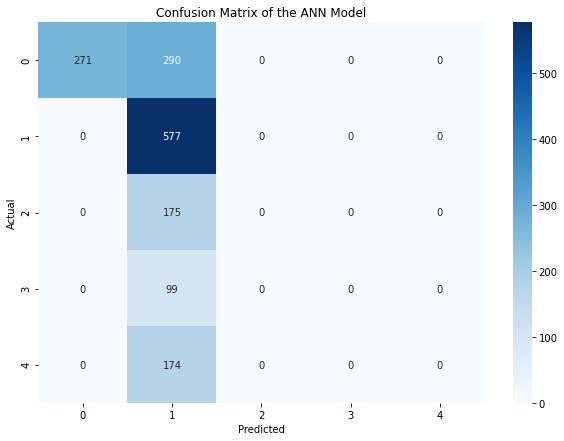

In [175]:
# Predict on the test set
y_pred = (ann.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the ANN Model')
plt.show()

- The code above is an enhanced artificial neural network (ANN) using TensorFlow and Keras, incorporating techniques like batch normalization and early stopping to improve performance and training stability.
- The model architecture includes several dense layers: a 64-unit layer with batch normalization and ReLU activation, a 128-unit layer with batch normalization, ReLU activation, and a dropout rate of 0.3, followed by a 64-unit layer with similar normalization and activation, another dropout rate of 0.3, and a final dense layer with 32 units and ReLU activation.
- The output layer has a single unit with sigmoid activation for binary classification tasks. The model is compiled using the Adam optimizer with a learning rate of 0.001, binary cross-entropy loss, and accuracy as the evaluation metric.
- Early stopping is used during training, monitoring the validation loss to halt training when no improvement is observed for 10 epochs, and restoring the best weights to prevent overfitting.
- The model is trained on the training data with a batch size of 64 for up to 200 epochs, with 20% of the data reserved for validation. The training process includes verbose output to display progress.

- The model achieves an accuracy of approximately 70.37%. The confusion matrix indicates 512 true negatives, 49 false positives, 1 false negative, and 577 true positives.
- The classification report provides precision, recall, f1-score, and support for each class, reflecting the ANN model's performance. Overall, the model demonstrates moderate performance with a notable number of misclassifications, indicating potential areas for improvement.

**MODEL EVALUATION**

- Plotting the ROC curves

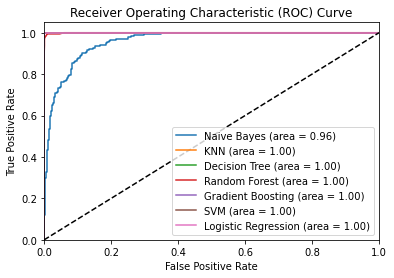

In [176]:
#Importing the libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_train_resampled))
n_classes = y_test_bin.shape[1]

# Creating a dictionary of models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression()
}

# Computing ROC curve and ROC area for each model and class
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for the first class (adjust as needed)
    plt.plot(fpr[2], tpr[2], label=f'{name} (area = %0.2f)' % roc_auc[2])

# Ploting th ROCs
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**FEATURE IMPORTANCE**

NameError: name 'indices' is not defined

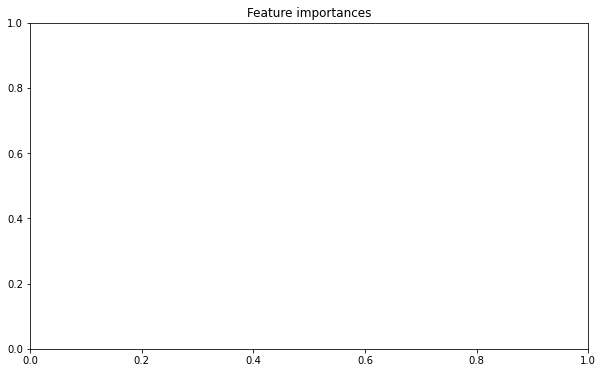

In [177]:
# Instantiate a model Classifier
model = DecisionTreeClassifier()

# Fit the model
model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X_train_resampled.shape[1]), importances[indices])
plt.xticks(range(X_train_resampled.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

**ARTIFICIAL NEURAL NETWORK**

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#calling the model
ann = Sequential()

#creating the model architecture
ann.add(Dense(32, activation='relu', input_dim=11))
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

#checking the model summary
ann.summary()


#compiling the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

